<div style="background-color: RGB(0,114,200); border-radius: 10px; padding: 20px; text-align: center;">
  <h1 style="color: #fff; font-family: Arial; font-size: 26px; margin: 0;">
    Analyse des performances Marketing 
  </h1>
</div>

<div style="border: 1px solid rgb(0,150,250); border-radius: 8px; padding: 15px; background-color: #f8fbff;">
  <h3 style="color: rgb(0,150,250); font-family: Arial; font-size: 18px; margin-top: 0;">
    Contexte du projet
  </h3>
  <p style="color: #333; font-size: 15px; font-family: Arial; line-height: 1.8; margin: 0;">
    Dans un marché de plus en plus concurrentiel, les entreprises investissent massivement dans le marketing digital afin d’attirer et de fidéliser leurs clients.
    Cependant, toutes les campagnes ne génèrent pas le même niveau d’engagement : certains clients réagissent fortement aux promotions, tandis que d’autres les ignorent complètement.<br><br>
    Ce projet s’inscrit dans cette logique d’optimisation : il vise à comprendre les comportements des clients vis-à-vis des publicités reçues
    (par email, SMS ou sur les réseaux sociaux) et à construire un modèle prédictif capable d’estimer la probabilité qu’un client <b>clique sur une publicité</b>.<br><br>
    À terme, cette approche permettra à l’entreprise :
    <ul style="margin: 8px 0 0 20px; line-height: 1.8;">
      <li>d’adapter ses campagnes aux profils les plus réactifs ;</li>
      <li>de réduire les coûts d’envois inutiles ;</li>
      <li>et d’améliorer la satisfaction client grâce à une communication plus ciblée.</li>
    </ul>
  </p>
</div>


<div style="background-color: #f5f9ff; border-left: 5px solid rgb(0,114,200); padding: 15px; margin-bottom: 15px;">
  <p style="color: #0072C8; font-size: 16px; font-family: Arial; line-height: 1.6; margin: 0;">
    Chaque euro investi en marketing doit générer de la valeur. <br>
    L’objectif de ce projet est d’analyser les performances d’une campagne marketing multicanale <br>
    et de prédire la probabilité qu’un client <b>clique sur une publicité</b>.<br><br>
    <b>Question clé :</b> <em>Prédire si un client va cliquer sur une publicité après une campagne marketing (email, SMS ou réseaux sociaux).</em>
  </p>
</div>


<div style="border: 1px solid rgb(0,150,250); border-radius: 8px; padding: 15px; background-color: #f8fbff;">
  <h3 style="color: rgb(0,150,250); font-family: Arial; font-size: 18px; margin-top: 0;">
    Objectifs
  </h3>
  <ul style="color: #333; font-size: 15px; font-family: Arial; line-height: 1.8; margin-left: 10px;">
    <li><b>Objectif principal :</b> prédire si un client va <b>cliquer sur une publicité</b> après une campagne marketing (email, SMS ou réseaux sociaux).</li>
    <li><b>Objectif secondaire :</b> identifier les caractéristiques des clients les plus réactifs aux campagnes afin d’optimiser la stratégie marketing.</li>
  </ul>
</div>


# **Importation des bibliothèques**

In [122]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro

# **Mes fonctions**

In [124]:
def nbr_outliers(dataframe,colonne):
    data =  dataframe[colonne].dropna()
    Q1 = np.percentile(data,25)
    Q3 = np.percentile(data,75)
    IQR = Q3 - Q1
    borne_inf = Q1 - 1.5 * IQR
    borne_sup = Q3 + 1.5 * IQR
    outliers = ( dataframe[colonne] < borne_inf ) | (dataframe[colonne] >borne_sup) 

    nb_outliers = outliers.sum() 

    print(f"{colonne} : {nb_outliers} outliers détectés "
          f"({100*nb_outliers/len(dataframe):.2f}% des valeurs)")
    print(f"Borne inférieure : {borne_inf:.2f}, Borne supérieure : {borne_sup:.2f}")


def afficher_outliers(dataframe,colonne):
    
    data =  dataframe[colonne].dropna()
    Q1 = np.percentile(data,25)
    Q3 = np.percentile(data,75)
    IQR = Q3 - Q1
    borne_inf = Q1 - 1.5 * IQR
    borne_sup = Q3 + 1.5 * IQR
    outliers = ( dataframe[colonne] < borne_inf ) | (dataframe[colonne] >borne_sup) 
    return outliers


def capping_iqr(df, colonne):
    q1 = df[colonne].quantile(0.25)
    q3 = df[colonne].quantile(0.75)
    iqr = q3 - q1
    borne_inf = q1 - 1.5 * iqr
    borne_sup = q3 + 1.5 * iqr
    
    # Capping
    df[colonne] = np.where(df[colonne] > borne_sup, borne_sup,
                    np.where(df[colonne] < borne_inf, borne_inf, df[colonne]))
    
    print(f"{colonne} : bornes [{borne_inf:.2f}, {borne_sup:.2f}] appliquées.")
    return df

    

🎯 Projet : “Marketing Predict Pro”

Objectif : prédire si un client va cliquer sur une publicité après une campagne marketing (email ou SMS).

🧩 Contexte

Une entreprise lance régulièrement des campagnes marketing pour promouvoir ses produits.
Elle veut savoir quels clients sont les plus susceptibles de cliquer sur une publicité (ou ouvrir un lien) afin d’optimiser ses envois et réduire les coûts.

👉 Cible à prédire : clic_pub

1 = le client a cliqué sur la pub

0 = le client n’a pas cliqué

| Colonne              | Type      | Description                                                                   |
| -------------------- | --------- | ----------------------------------------------------------------------------- |
| **client_id**        | entier    | Identifiant unique du client.                                                 |
| **age**              | entier    | Âge du client (18 à 70 ans).                                                  |
| **sexe**             | catégorie | Sexe du client : *Homme* ou *Femme*.                                          |
| **revenu_mensuel**   | numérique | Revenu mensuel estimé du client en euros. *(Contient des valeurs manquantes)* |
| **anciennete_mois**  | entier    | Ancienneté du client (en mois).                                               |
| **fidelite_score**   | entier    | Score de fidélité entre 0 et 100 (plus élevé = client plus fidèle).           |
| **categorie_client** | catégorie | Segmentation marketing : *bronze*, *silver*, *gold*, *platinum*.              |

| Colonne                  | Type      | Description                                                              |
| ------------------------ | --------- | ------------------------------------------------------------------------ |
| **canal_marketing**      | catégorie | Canal utilisé : *email*, *sms*, *reseaux_sociaux*.                       |
| **jour_envoi**           | entier    | Jour de la semaine où la campagne est envoyée (0 = Lundi, 6 = Dimanche). |
| **heure_envoi**          | entier    | Heure d’envoi de la campagne (entre 8h et 21h).                          |
| **taux_remise**          | numérique | Taux de remise proposé (0 à 0.5). *(Contient des valeurs manquantes)*    |
| **taux_ouverture_email** | numérique | Taux d’ouverture des emails du client (0.05 à 0.95).                     |

| Colonne                 | Type      | Description                                                                                           |
| ----------------------- | --------- | ----------------------------------------------------------------------------------------------------- |
| **nb_campagnes_recues** | entier    | Nombre de campagnes reçues au cours des 3 derniers mois.                                              |
| **nb_achats_3mois**     | entier    | Nombre d’achats réalisés dans les 3 derniers mois.                                                    |
| **temps_site_moyen**    | numérique | Temps moyen passé sur le site (en secondes). Contient des valeurs extrêmes artificiellement ajoutées. |
| **appareil**            | catégorie | Type d’appareil utilisé : *mobile*, *ordinateur*, *tablette*.                                         |

| Colonne      | Type    | Description                                                          |
| ------------ | ------- | -------------------------------------------------------------------- |
| **clic_pub** | binaire | 1 = le client a cliqué sur la publicité ; 0 = il ne l’a pas cliquée. |


In [127]:
data = pd.read_csv('marketing_predict_Pro.csv')

# **Exploration des données**

In [129]:
data.head(20)

,client_id,age,sexe,revenu_mensuel,anciennete_mois,canal_marketing,jour_envoi,heure_envoi,taux_remise,nb_campagnes_recues,nb_achats_3mois,temps_site_moyen,appareil,clic_pub,taux_ouverture_email,fidelite_score,categorie_client
0,1,22,Femme,3334.0,9,email,2,20,0.04,3,1,159.0,mobile,1,0.23,25,bronze
1,2,58,Homme,1546.0,109,email,1,16,0.22,3,3,101.0,ordinateur,0,0.42,32,silver
2,3,52,Femme,2514.0,2,email,5,15,0.40,3,3,195.0,mobile,1,0.43,68,gold
3,4,40,Homme,2234.0,103,reseaux_sociaux,0,11,0.16,0,1,57.0,ordinateur,0,0.79,45,silver
4,5,40,Femme,1817.0,70,email,6,15,0.35,2,1,98.0,mobile,1,0.37,2,bronze
5,6,62,Homme,3043.0,74,sms,4,19,0.21,4,1,168.0,tablette,1,0.24,98,platinum
6,7,22,Femme,800.0,115,email,3,16,0.12,6,3,163.0,mobile,0,0.54,96,platinum
7,8,54,Homme,2621.0,94,email,1,9,0.15,6,0,80.0,mobile,0,0.59,18,bronze
8,9,28,Homme,2892.0,18,sms,1,18,0.15,5,1,68.0,mobile,0,0.93,8,bronze
9,10,22,Femme,1369.0,116,reseaux_sociaux,1,19,0.37,3,1,151.0,ordinateur,0,0.65,35,silver


In [130]:
L,C = data.shape
print(f"Le DataFrame contient {L} ligne(s) et {C} colonne(s) ")

Le DataFrame contient 8000 ligne(s) et 17 colonne(s) 


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   client_id             8000 non-null   int64  
 1   age                   8000 non-null   int64  
 2   sexe                  8000 non-null   object 
 3   revenu_mensuel        7700 non-null   float64
 4   anciennete_mois       8000 non-null   int64  
 5   canal_marketing       8000 non-null   object 
 6   jour_envoi            8000 non-null   int64  
 7   heure_envoi           8000 non-null   int64  
 8   taux_remise           7850 non-null   float64
 9   nb_campagnes_recues   8000 non-null   int64  
 10  nb_achats_3mois       8000 non-null   int64  
 11  temps_site_moyen      8000 non-null   float64
 12  appareil              8000 non-null   object 
 13  clic_pub              8000 non-null   int64  
 14  taux_ouverture_email  8000 non-null   float64
 15  fidelite_score       

les données sont bien typées

In [133]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
client_id,8000.0,4000.500000,2309.545410,1.00,2000.75,4000.50,6000.25,8000.00
age,8000.0,43.246250,14.984565,18.00,30.00,43.00,56.00,69.00
revenu_mensuel,7700.0,3044.133117,1169.137002,800.00,2207.00,3019.00,3843.00,6840.00
anciennete_mois,8000.0,60.227375,34.403239,1.00,30.00,60.00,90.00,119.00
jour_envoi,8000.0,2.965125,2.005720,0.00,1.00,3.00,5.00,6.00
heure_envoi,8000.0,14.560125,4.028357,8.00,11.00,15.00,18.00,21.00
taux_remise,7850.0,0.249405,0.144045,0.00,0.13,0.25,0.37,0.50
nb_campagnes_recues,8000.0,3.028125,1.762661,0.00,2.00,3.00,4.00,12.00
nb_achats_3mois,8000.0,1.490750,1.229879,0.00,1.00,1.00,2.00,8.00
temps_site_moyen,8000.0,134.001125,153.837202,0.00,79.00,120.00,161.00,2109.00


* **petit analyse au niveau de l'âge** : on contate que l'âge moyen est de 43 ans  l'écart entre les âges est de 14 ans , l'âge minimum est de 18 ans , 25% des utilisateurs ont moins de 30 ans , 50% ont moins de 43 ans , 75% ont moins de 56 ans , et l'âge le plus élevé est de 69 ans.

* **au niveau du revenu mensuel** : le revenu moyen est de 3044 , l'écart entre les salaires est de 1169 , le salaire minimum est de 800.0 , 25% des utilisateur ont moins de 2207 , 50% des utilisateurs ont moins de 3019 , 75% ont moins de 3843 , le salaire maximum est de 6840.

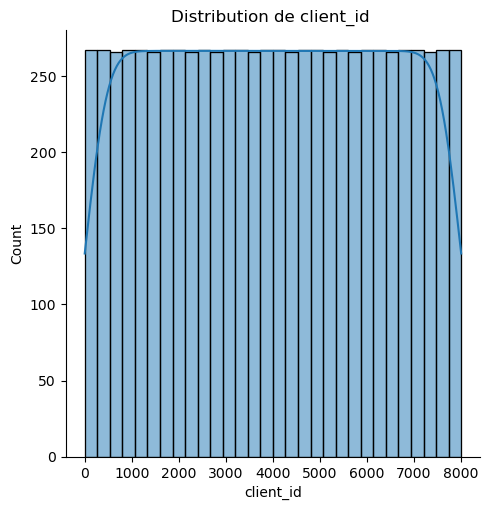

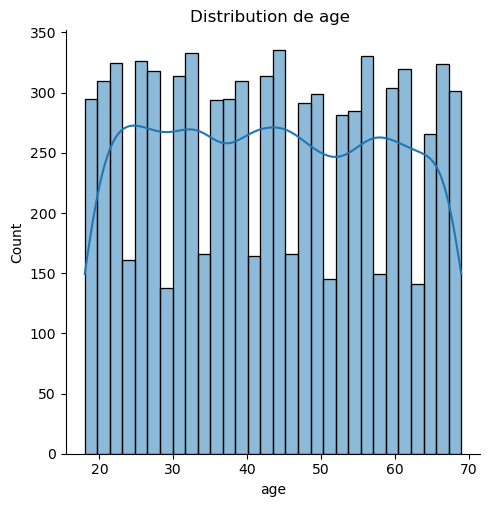

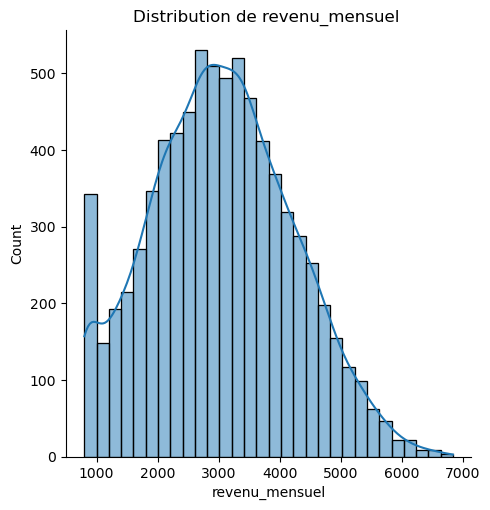

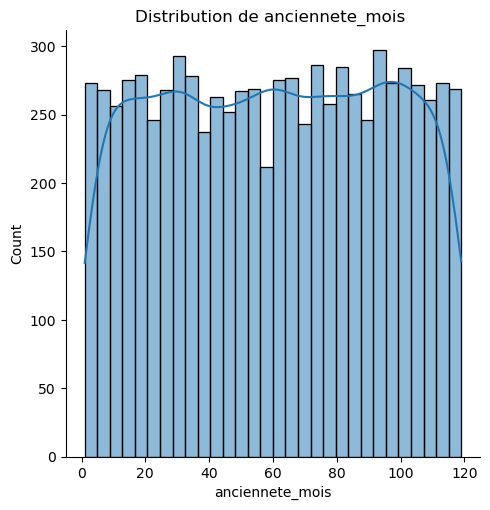

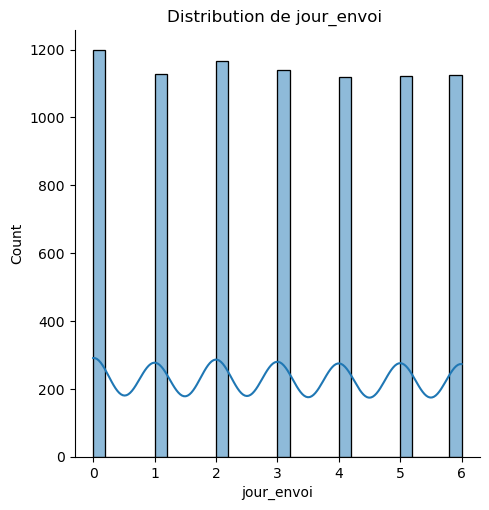

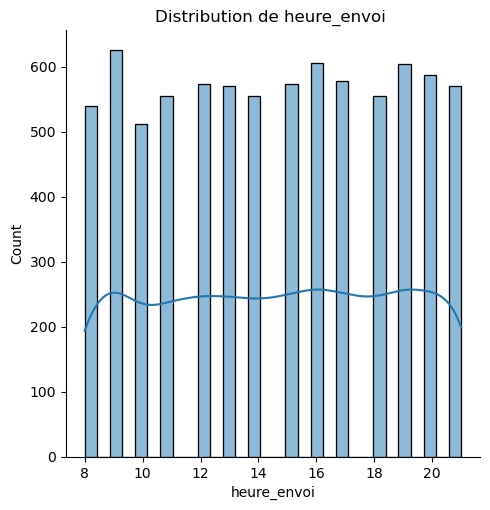

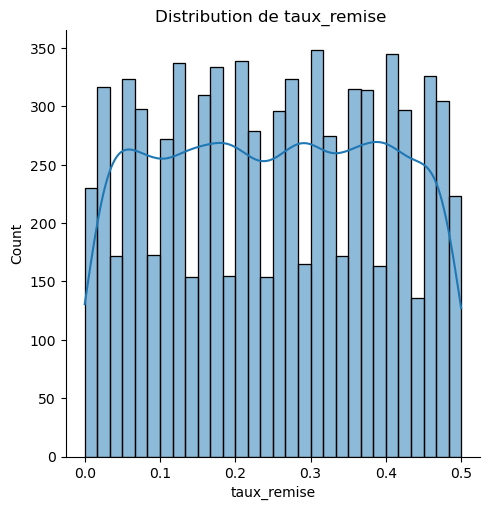

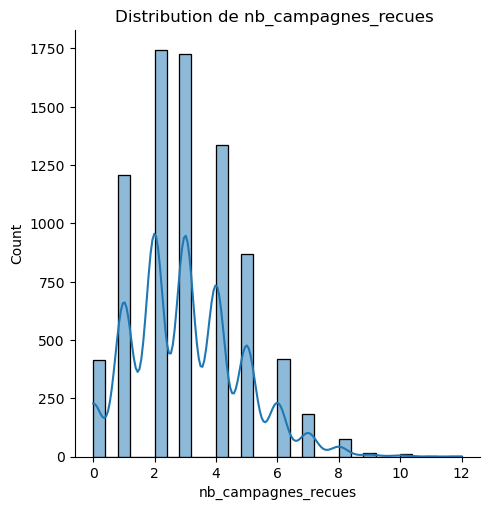

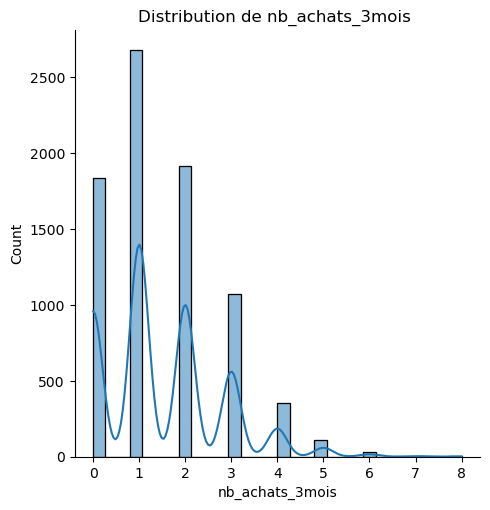

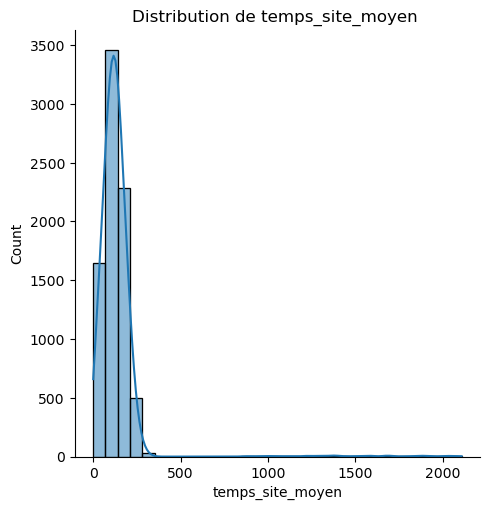

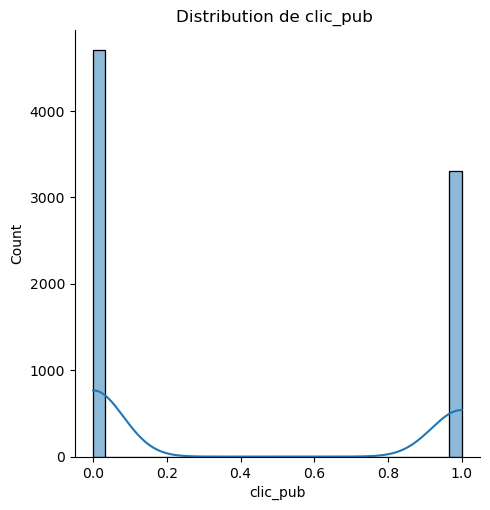

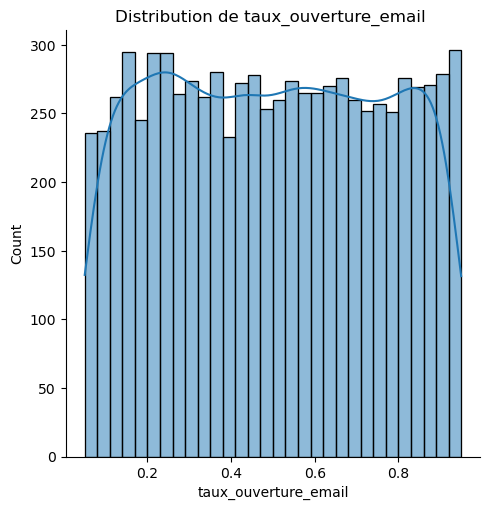

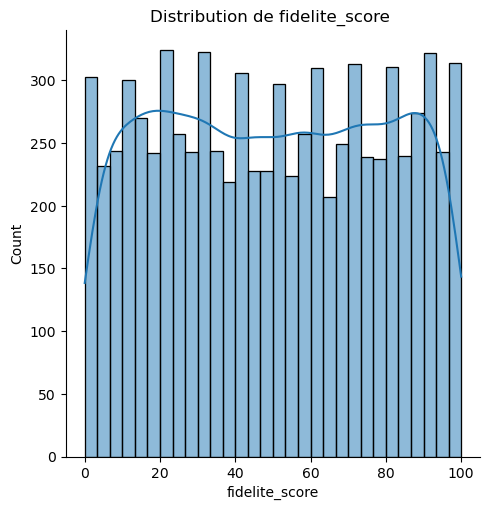

In [135]:
colonnes_numeriques = data.select_dtypes(include=['number'])

for col in colonnes_numeriques :
    sns.displot( data = data ,  x = col , kde=True , bins=30)
    plt.title(f"Distribution de {col} ")
    plt.show()

In [136]:
for col in colonnes_numeriques:
    sample = data[col].dropna().sample(5000 , random_state=42)
    stat ,p = shapiro(sample)
    print(f" {col} : P-value = {p:.4f}")
    print("")

 client_id : P-value = 0.0000

 age : P-value = 0.0000

 revenu_mensuel : P-value = 0.0000

 anciennete_mois : P-value = 0.0000

 jour_envoi : P-value = 0.0000

 heure_envoi : P-value = 0.0000

 taux_remise : P-value = 0.0000

 nb_campagnes_recues : P-value = 0.0000

 nb_achats_3mois : P-value = 0.0000

 temps_site_moyen : P-value = 0.0000

 clic_pub : P-value = 0.0000

 taux_ouverture_email : P-value = 0.0000

 fidelite_score : P-value = 0.0000



**Le test de shapiro confirme ici qu'aucune variable ne suit une distribution normale**

#  Nettoyage des Données (Data Cleaning)

In [139]:
data.duplicated().sum()

0

In [140]:
data.isnull().sum()

client_id                 0
age                       0
sexe                      0
revenu_mensuel          300
anciennete_mois           0
canal_marketing           0
jour_envoi                0
heure_envoi               0
taux_remise             150
nb_campagnes_recues       0
nb_achats_3mois           0
temps_site_moyen          0
appareil                  0
clic_pub                  0
taux_ouverture_email      0
fidelite_score            0
categorie_client          0
dtype: int64

In [141]:
( data.isnull().sum() / 100).sort_values(ascending=False)

revenu_mensuel          3.0
taux_remise             1.5
nb_campagnes_recues     0.0
fidelite_score          0.0
taux_ouverture_email    0.0
clic_pub                0.0
appareil                0.0
temps_site_moyen        0.0
nb_achats_3mois         0.0
client_id               0.0
age                     0.0
heure_envoi             0.0
jour_envoi              0.0
canal_marketing         0.0
anciennete_mois         0.0
sexe                    0.0
categorie_client        0.0
dtype: float64

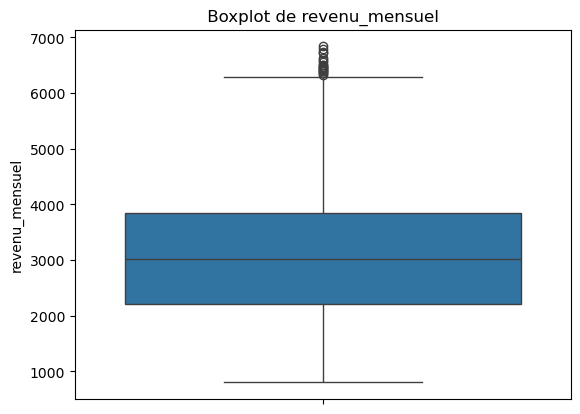

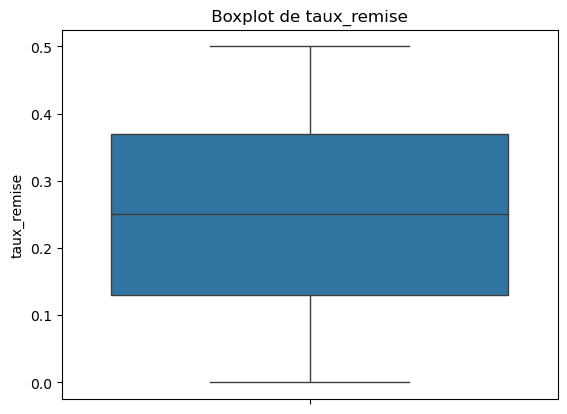

In [142]:
colonne_V_manquante = ['revenu_mensuel','taux_remise']

for col in colonne_V_manquante :
    sns.boxplot( data = data , y = col)
    plt.title(f" Boxplot de {col} ")
    plt.show()

**La colonne revenu_mensuel présente des outliers ce qu'a confirmé le describe en haut avec un écart assez grand entre les salaires des différents utilisateurs et la colonnes taux_remise ne présentre aucun outliers**

In [144]:
nbr_outliers(data,'revenu_mensuel')

revenu_mensuel : 19 outliers détectés (0.24% des valeurs)
Borne inférieure : -247.00, Borne supérieure : 6297.00


In [145]:
outliers_revenu_mensuel = afficher_outliers(data ,'revenu_mensuel')

data[outliers_revenu_mensuel].sort_values(by='revenu_mensuel',ascending=False).head(5)

,client_id,age,sexe,revenu_mensuel,anciennete_mois,canal_marketing,jour_envoi,heure_envoi,taux_remise,nb_campagnes_recues,nb_achats_3mois,temps_site_moyen,appareil,clic_pub,taux_ouverture_email,fidelite_score,categorie_client
4614,4615,47,Homme,6840.0,98,email,0,19,0.34,2,2,141.0,mobile,0,0.91,17,bronze
5581,5582,61,Homme,6789.0,95,email,0,14,0.04,7,1,91.0,mobile,0,0.27,48,silver
7292,7293,32,Homme,6730.0,70,sms,4,9,0.16,0,2,201.0,mobile,0,0.89,20,bronze
2079,2080,24,Femme,6721.0,70,email,3,10,0.32,5,2,153.0,mobile,1,0.47,44,silver
1080,1081,65,Homme,6632.0,41,email,1,11,0.10,3,2,244.0,mobile,0,0.91,7,bronze


In [146]:
data_clean = data.copy()

In [147]:
data_clean['revenu_mensuel'] = data_clean['revenu_mensuel'].fillna(data_clean['revenu_mensuel'].median() )
data_clean['taux_remise'] = data_clean['taux_remise'].fillna(data_clean['taux_remise'].mean() )

In [148]:
data_clean.isnull().sum()

client_id               0
age                     0
sexe                    0
revenu_mensuel          0
anciennete_mois         0
canal_marketing         0
jour_envoi              0
heure_envoi             0
taux_remise             0
nb_campagnes_recues     0
nb_achats_3mois         0
temps_site_moyen        0
appareil                0
clic_pub                0
taux_ouverture_email    0
fidelite_score          0
categorie_client        0
dtype: int64

In [149]:
col_num = data_clean.select_dtypes(include=['number'])

for col in col_num:
    print(f"=== colonne : {col} === ")
    nbr_outliers(data_clean,col)
    print("")

=== colonne : client_id === 
client_id : 0 outliers détectés (0.00% des valeurs)
Borne inférieure : -3998.50, Borne supérieure : 11999.50

=== colonne : age === 
age : 0 outliers détectés (0.00% des valeurs)
Borne inférieure : -9.00, Borne supérieure : 95.00

=== colonne : revenu_mensuel === 
revenu_mensuel : 29 outliers détectés (0.36% des valeurs)
Borne inférieure : -90.00, Borne supérieure : 6142.00

=== colonne : anciennete_mois === 
anciennete_mois : 0 outliers détectés (0.00% des valeurs)
Borne inférieure : -60.00, Borne supérieure : 180.00

=== colonne : jour_envoi === 
jour_envoi : 0 outliers détectés (0.00% des valeurs)
Borne inférieure : -5.00, Borne supérieure : 11.00

=== colonne : heure_envoi === 
heure_envoi : 0 outliers détectés (0.00% des valeurs)
Borne inférieure : 0.50, Borne supérieure : 28.50

=== colonne : taux_remise === 
taux_remise : 0 outliers détectés (0.00% des valeurs)
Borne inférieure : -0.23, Borne supérieure : 0.73

=== colonne : nb_campagnes_recues === 


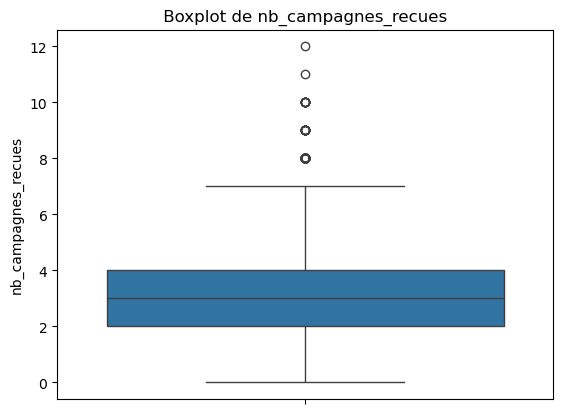

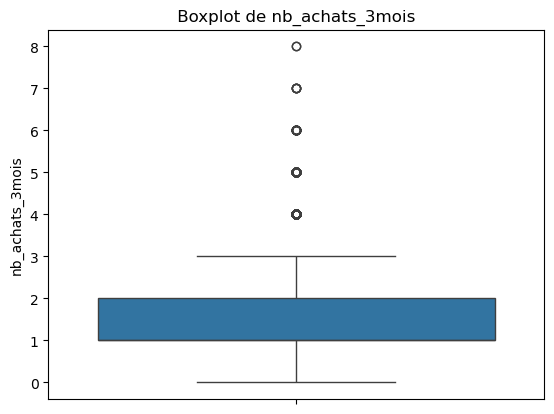

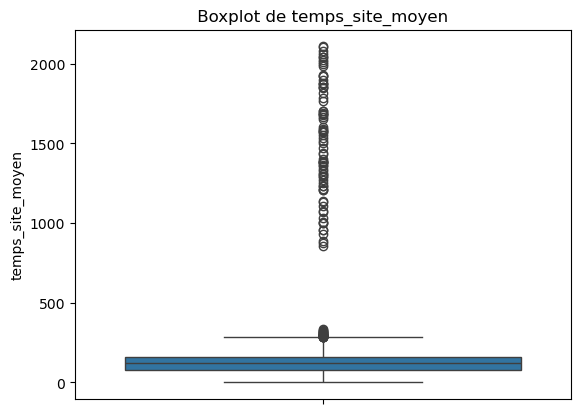

In [150]:
colonne_outliers_detectes = ['nb_campagnes_recues','nb_achats_3mois','temps_site_moyen']

for col in colonne_outliers_detectes :
    sns.boxplot( data = data_clean , y = col)
    plt.title(f" Boxplot de {col} ")
    plt.show()

In [151]:
outliers_temps_site_moyen = afficher_outliers(data_clean ,'temps_site_moyen')

data_clean[outliers_temps_site_moyen].sort_values(by='temps_site_moyen',ascending=False).head(10)

,client_id,age,sexe,revenu_mensuel,anciennete_mois,canal_marketing,jour_envoi,heure_envoi,taux_remise,nb_campagnes_recues,nb_achats_3mois,temps_site_moyen,appareil,clic_pub,taux_ouverture_email,fidelite_score,categorie_client
7810,7811,44,Femme,3151.0,30,email,6,9,0.49,2,1,2109.0,ordinateur,0,0.27,15,bronze
6473,6474,67,Femme,3019.0,62,sms,6,11,0.24,6,1,2103.0,tablette,1,0.72,67,gold
5850,5851,26,Homme,2337.0,113,sms,0,14,0.39,3,1,2079.0,ordinateur,1,0.14,11,bronze
31,32,29,Homme,3019.0,86,sms,3,15,0.19,4,1,2062.0,mobile,0,0.64,4,bronze
872,873,23,Femme,4013.0,98,email,5,19,0.38,3,1,2045.0,mobile,0,0.25,48,silver
2791,2792,26,Homme,2926.0,49,reseaux_sociaux,1,17,0.38,2,1,2040.0,tablette,1,0.13,77,gold
1633,1634,63,Homme,1623.0,39,sms,3,11,0.30,3,2,2025.0,mobile,0,0.93,68,gold
1110,1111,50,Homme,3662.0,34,email,1,21,0.37,5,2,2012.0,mobile,1,0.55,0,bronze
7929,7930,35,Femme,1143.0,114,email,6,9,0.45,1,1,1997.0,ordinateur,1,0.64,76,gold
24,25,58,Femme,3420.0,15,email,4,12,0.02,4,2,1987.0,mobile,0,0.64,50,silver


In [152]:
data_clean = capping_iqr(data_clean, 'temps_site_moyen')

temps_site_moyen : bornes [-44.00, 284.00] appliquées.


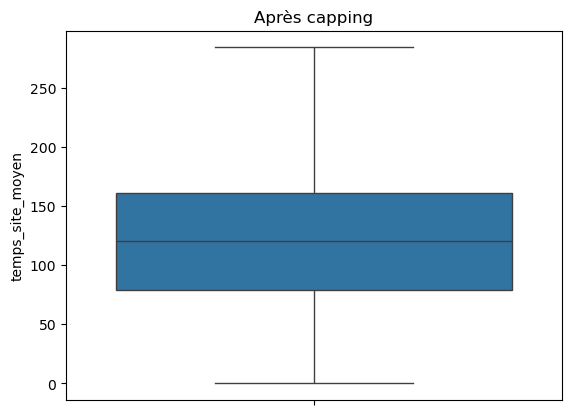

In [153]:
sns.boxplot(y=data_clean['temps_site_moyen'])
plt.title("Après capping")
plt.show()

* **on coupe les valeurs extrêmes**
* **on conserve la distribution**
* **on ne supprime aucune ligne**

# Analyse Exploratoire (EDA) 

* Corrélation

In [157]:
col_num.corr()

,client_id,age,revenu_mensuel,anciennete_mois,jour_envoi,heure_envoi,taux_remise,nb_campagnes_recues,nb_achats_3mois,temps_site_moyen,clic_pub,taux_ouverture_email,fidelite_score
client_id,1.000000,-0.019047,0.027271,-0.032274,0.008745,0.014158,-0.020577,0.008418,0.007720,0.001555,-0.002536,0.005049,0.020033
age,-0.019047,1.000000,0.010389,0.002004,0.016808,-0.015055,-0.006321,-0.007608,0.015136,0.002371,-0.001375,0.011385,0.009278
revenu_mensuel,0.027271,0.010389,1.000000,-0.009273,0.007692,0.001136,-0.008970,0.001549,0.000920,0.005550,-0.105645,0.015807,-0.002766
anciennete_mois,-0.032274,0.002004,-0.009273,1.000000,0.000075,-0.013307,-0.001680,-0.012335,-0.006174,-0.009647,0.029545,-0.013916,0.008879
jour_envoi,0.008745,0.016808,0.007692,0.000075,1.000000,0.000407,0.006209,-0.003117,-0.000460,0.023632,0.014958,0.018064,-0.002011
heure_envoi,0.014158,-0.015055,0.001136,-0.013307,0.000407,1.000000,-0.007216,-0.008029,-0.001313,-0.007565,-0.001483,-0.003072,0.008394
taux_remise,-0.020577,-0.006321,-0.008970,-0.001680,0.006209,-0.007216,1.000000,0.001024,0.016614,0.008661,0.272998,0.004695,-0.013974
nb_campagnes_recues,0.008418,-0.007608,0.001549,-0.012335,-0.003117,-0.008029,0.001024,1.000000,-0.003369,-0.008757,0.006213,0.006468,-0.004532
nb_achats_3mois,0.007720,0.015136,0.000920,-0.006174,-0.000460,-0.001313,0.016614,-0.003369,1.000000,0.002080,0.047803,0.010081,0.020971
temps_site_moyen,0.001555,0.002371,0.005550,-0.009647,0.023632,-0.007565,0.008661,-0.008757,0.002080,1.000000,0.009446,-0.013499,0.002565


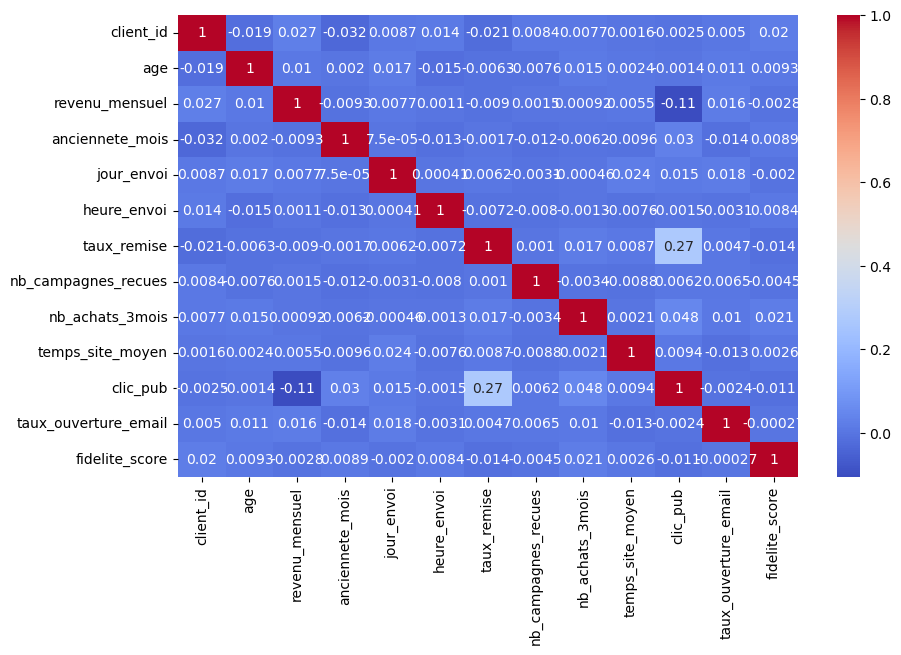

In [158]:
plt.figure(figsize=(10,6) )
sns.heatmap( col_num.corr() , annot=True , cmap='coolwarm' )
plt.show()

* On observe que les clics sur les publicités sont corrélés positivement avec le taux de remise (coefficient de corrélation de 0.27), ce qui suggère que plus le taux de remise est élevé, plus les utilisateurs ont tendance à cliquer sur les pubs. À l’inverse, la corrélation avec le revenu mensuel est négative (-0.11), ce qui pourrait indiquer que les utilisateurs ayant un revenu plus élevé cliquent moins souvent sur les publicités.

* **Analyse univariée**

In [161]:
col_categorielle = data_clean.select_dtypes(include=['object'])
col_categorielle

,sexe,canal_marketing,appareil,categorie_client
0,Femme,email,mobile,bronze
1,Homme,email,ordinateur,silver
2,Femme,email,mobile,gold
3,Homme,reseaux_sociaux,ordinateur,silver
4,Femme,email,mobile,bronze
...,...,...,...,...
7995,Femme,sms,mobile,bronze
7996,Homme,email,ordinateur,silver
7997,Homme,email,mobile,silver
7998,Femme,sms,ordinateur,silver


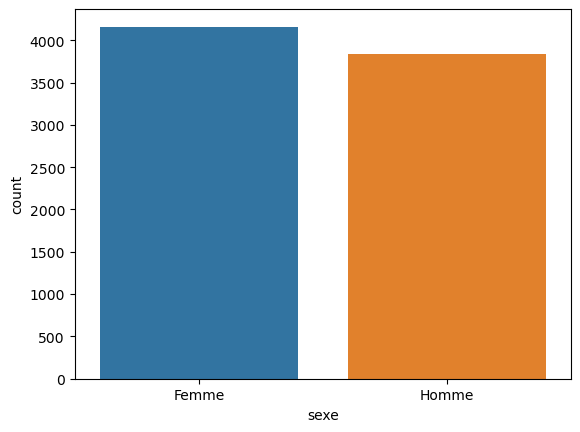

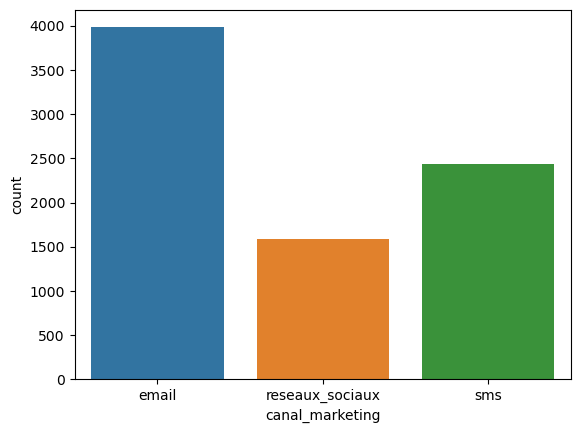

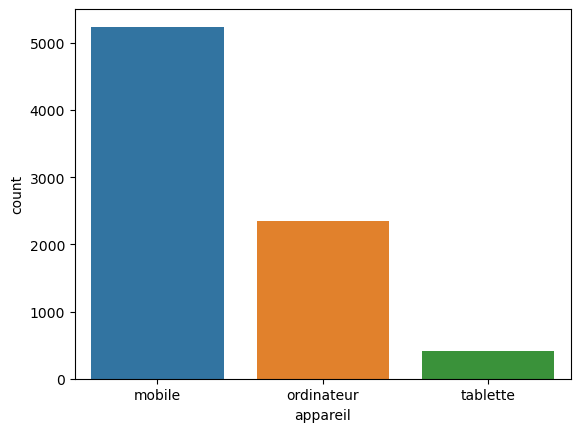

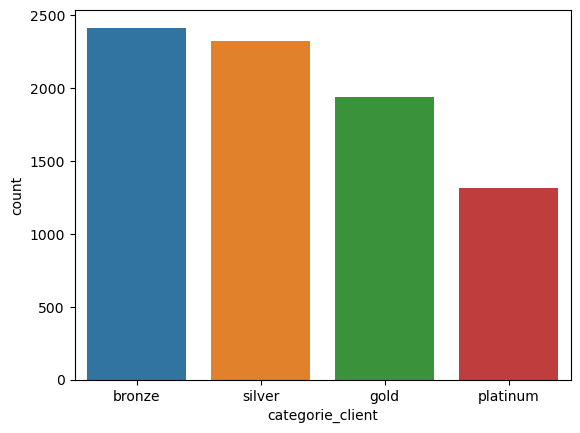

In [162]:
for col in col_categorielle :
    sns.countplot(data = data_clean , x = col , hue=col)
    plt.show()

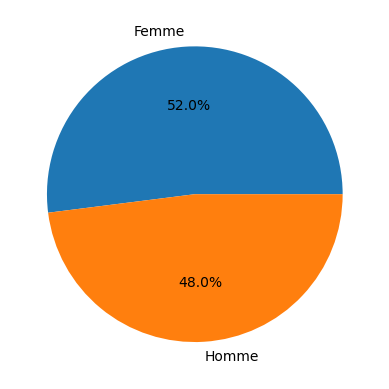

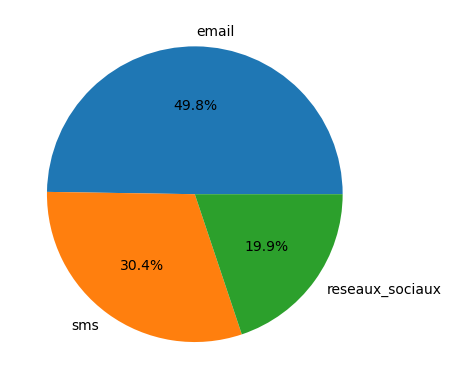

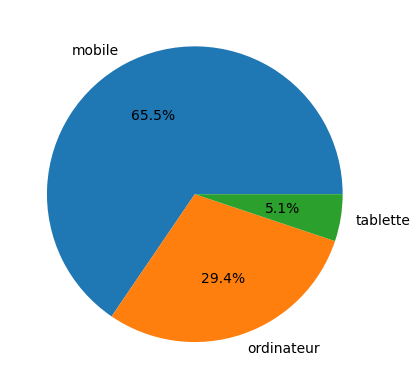

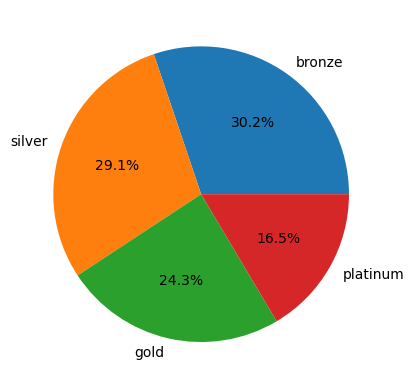

In [163]:
for col in col_categorielle :
    counts = data_clean[col].value_counts()
    plt.pie( counts.values , labels = counts.index , autopct='%1.1f%%' )
    plt.show()

In [164]:
col_num = data_clean.select_dtypes(include=['number'])
exclure = ['client_id','clic_pub']
col_num_filtre = [col for col in col_num if col not in exclure ]

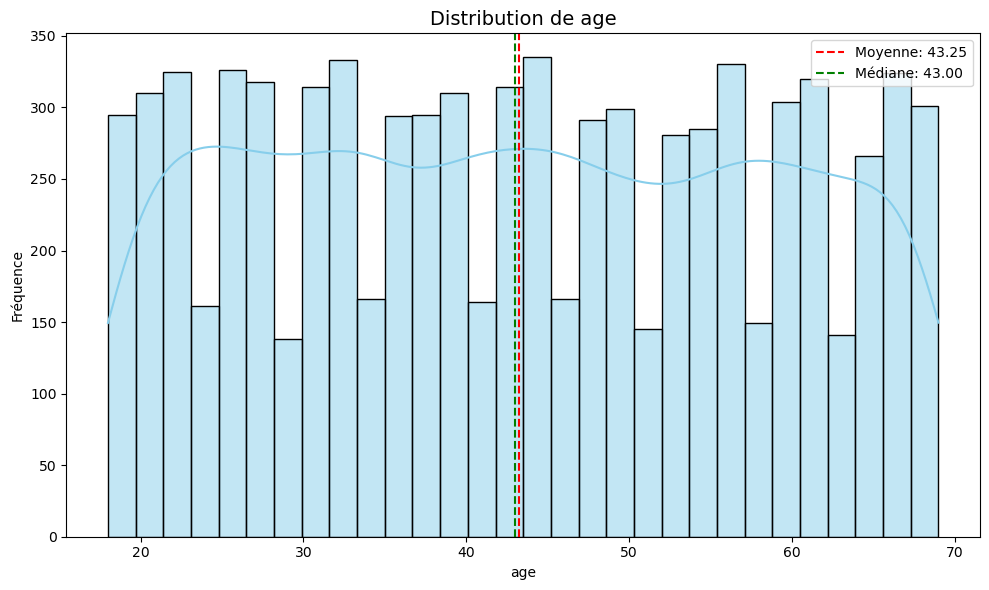

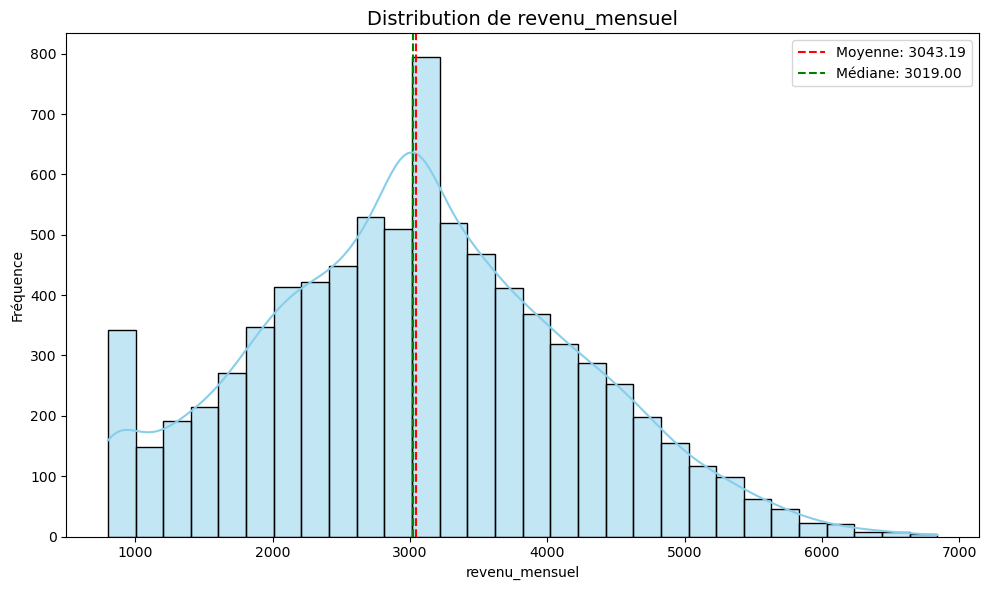

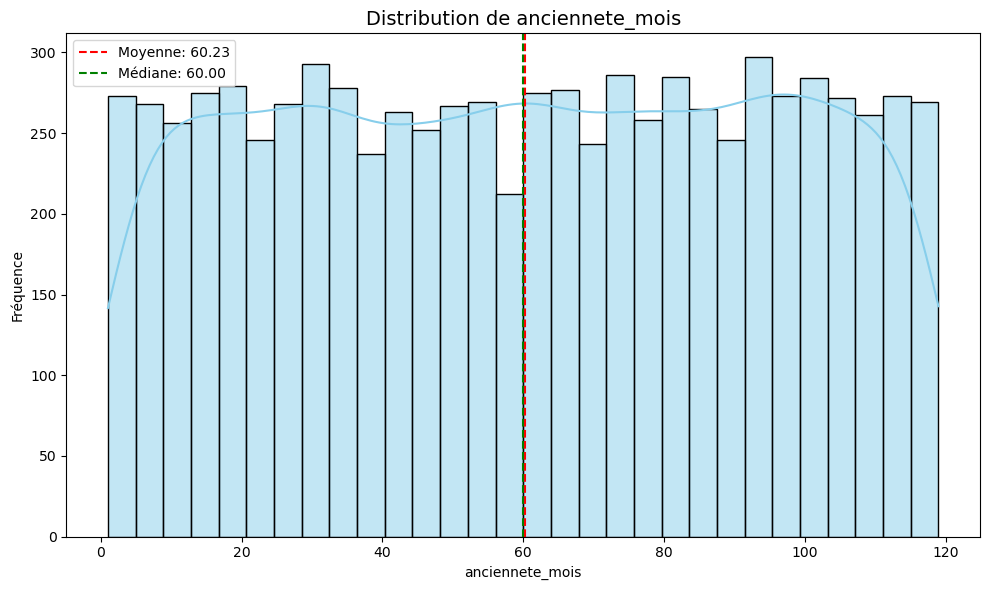

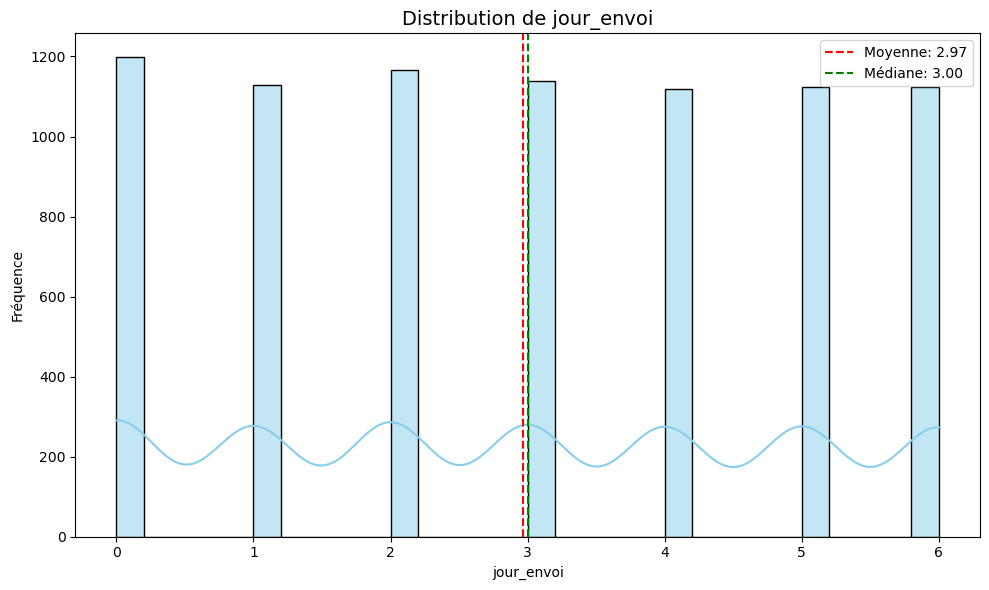

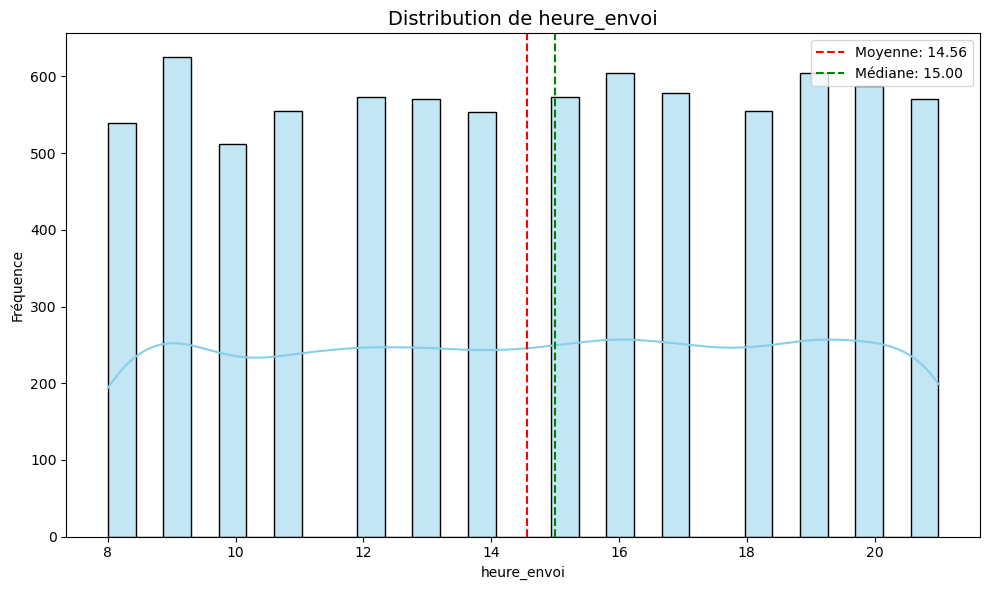

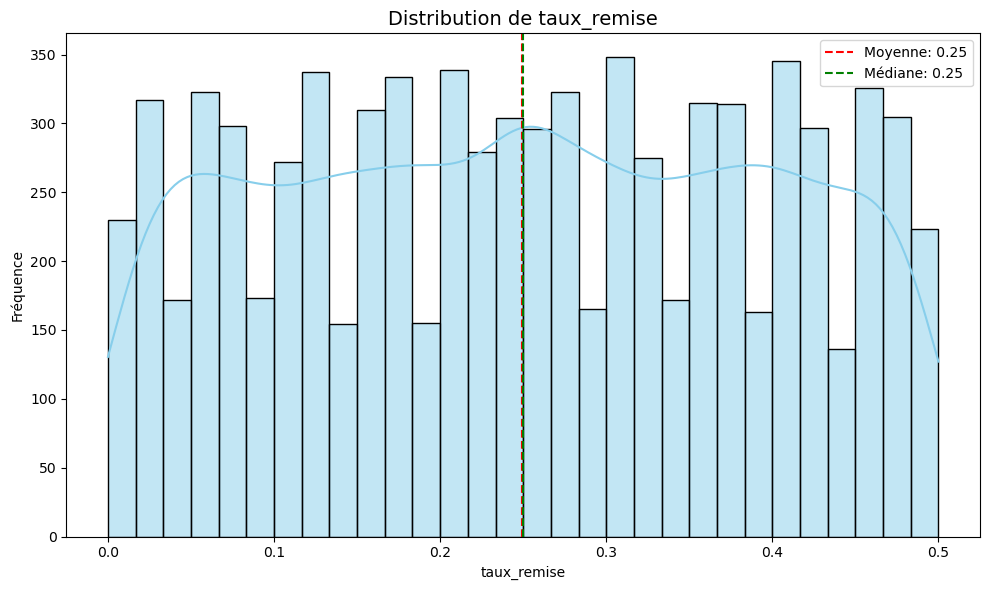

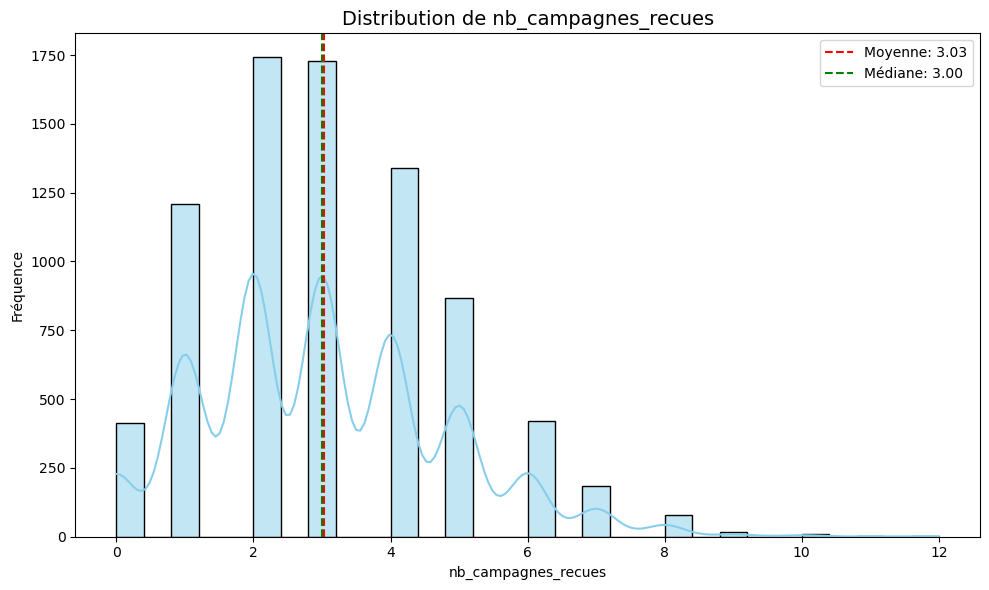

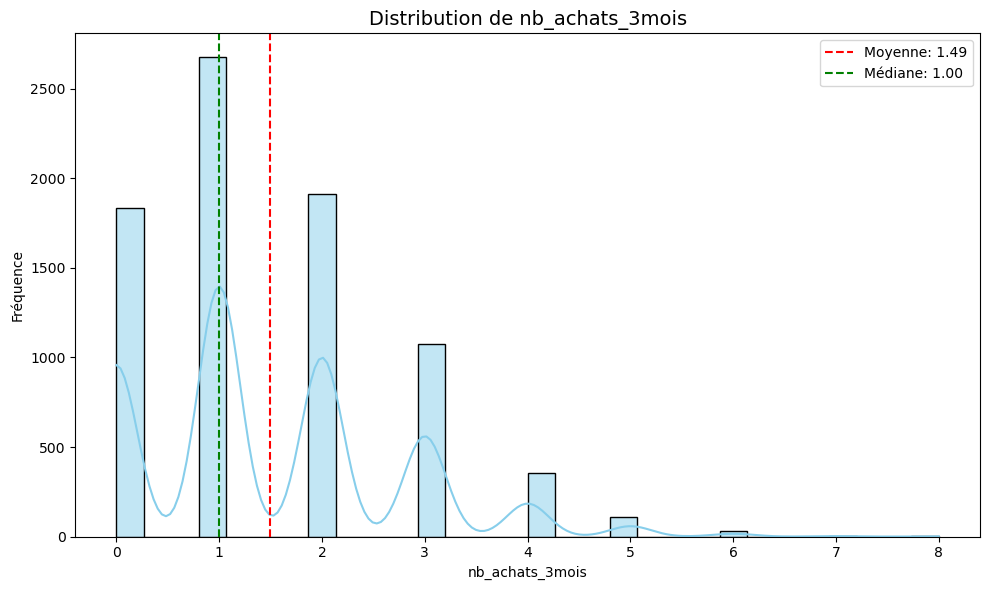

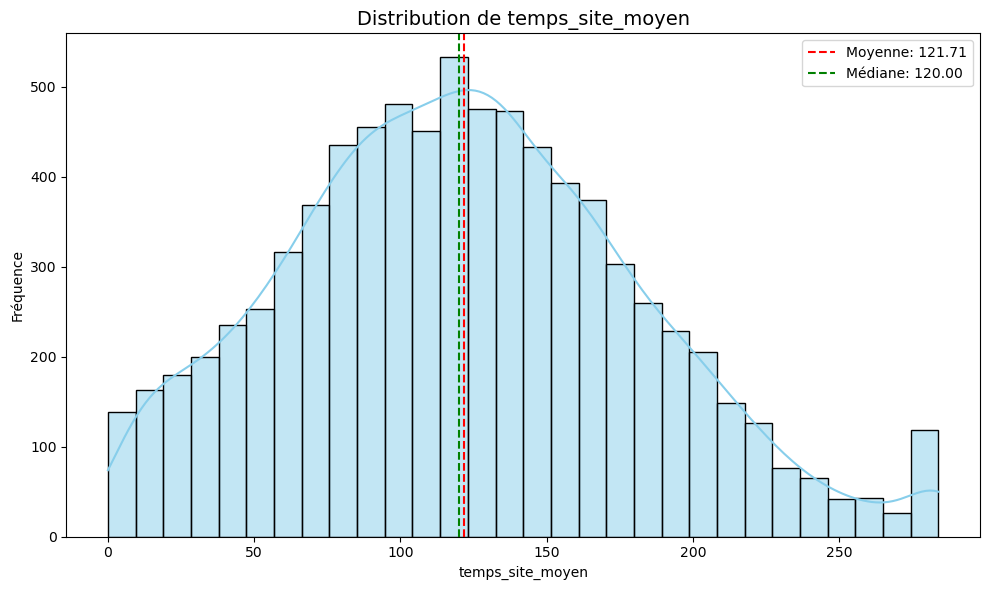

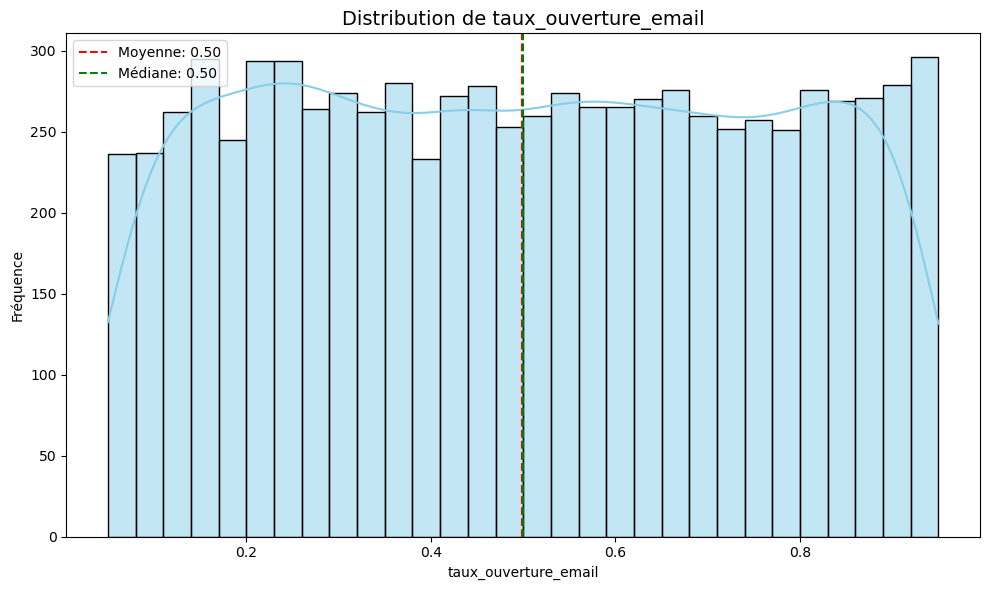

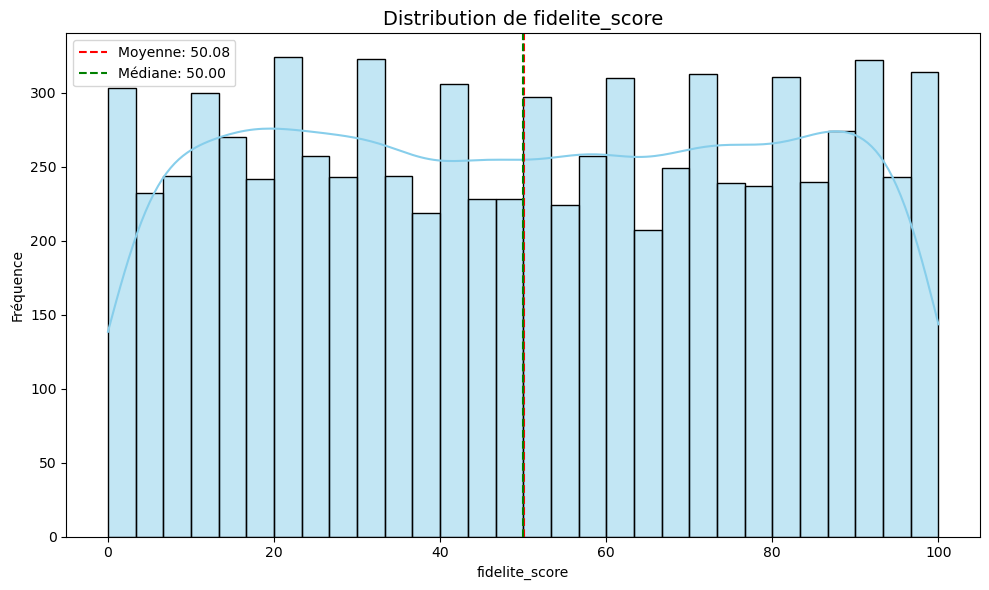

In [165]:
for col in col_num_filtre:
    
    plt.figure(figsize=(10, 6))
    sns.histplot(data_clean[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution de {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    
    mean = data_clean[col].mean()
    median = data_clean[col].median()
    
    plt.axvline(mean, color='red', linestyle='--', label=f'Moyenne: {mean:.2f}')
    plt.axvline(median, color='green', linestyle='--', label=f'Médiane: {median:.2f}')
    plt.legend()

    plt.tight_layout()
    plt.show()

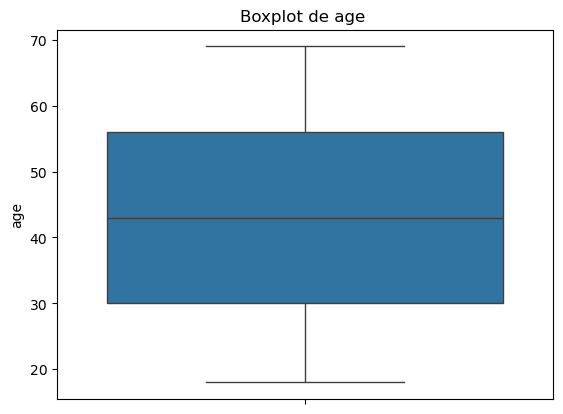

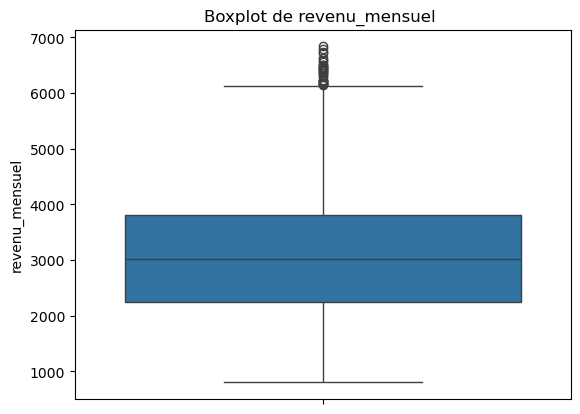

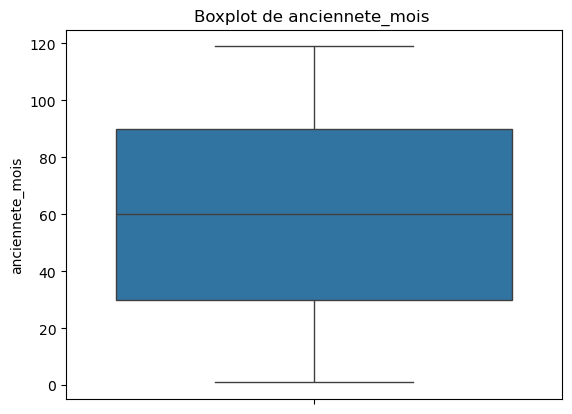

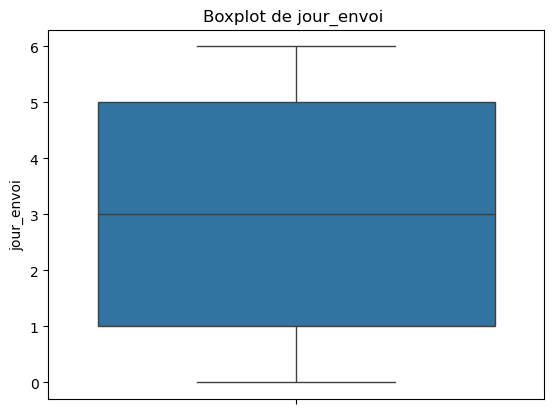

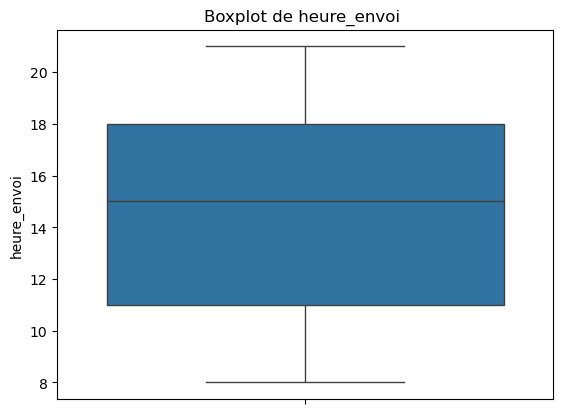

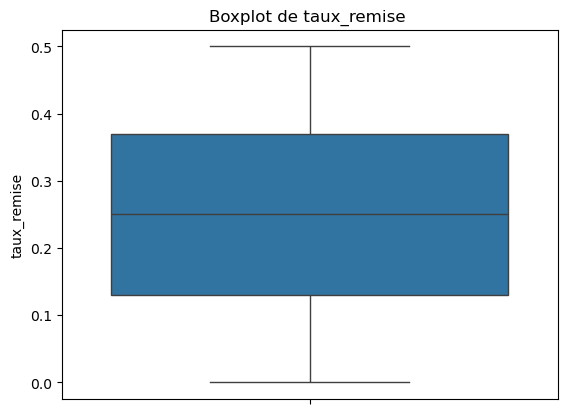

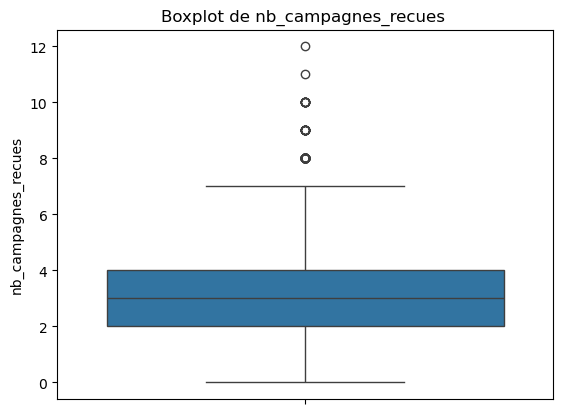

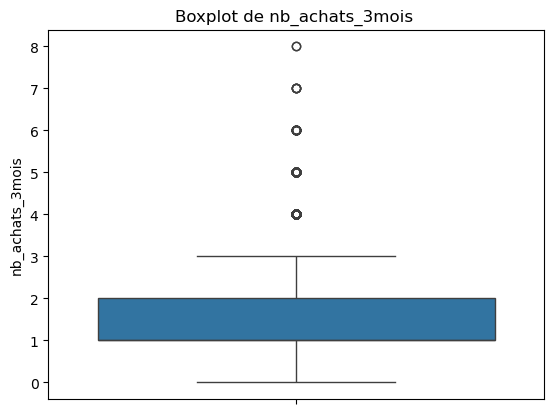

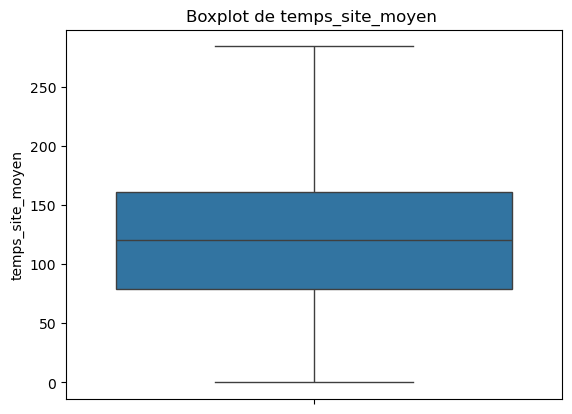

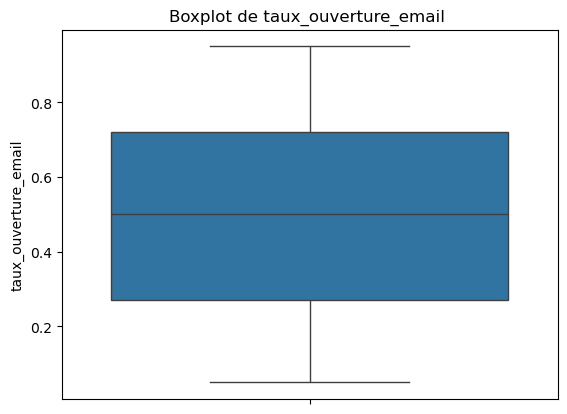

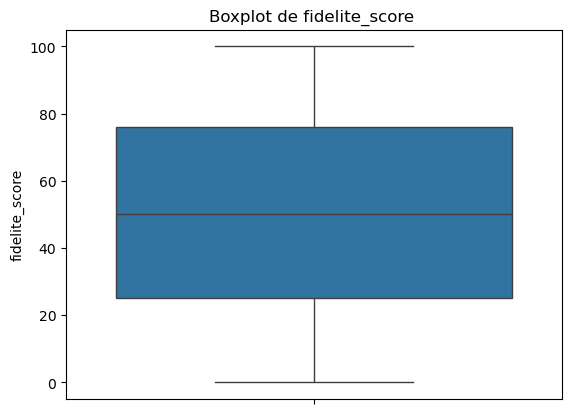

In [166]:
for col in col_num_filtre:
    sns.boxplot( data = data_clean , y = col)
    plt.title(f"Boxplot de {col} ")
    plt.show()

* **Analyse Bivariée**

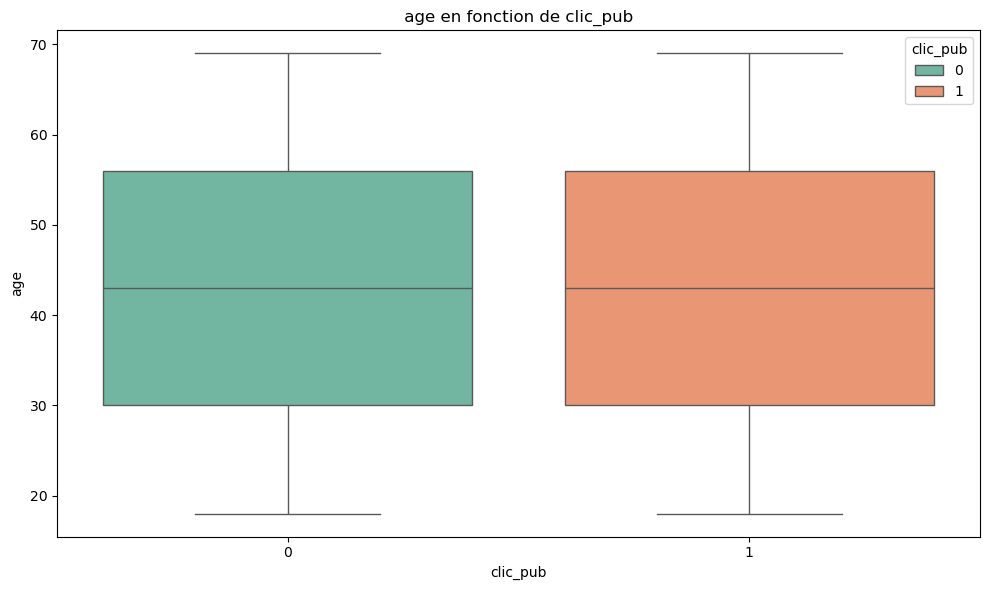

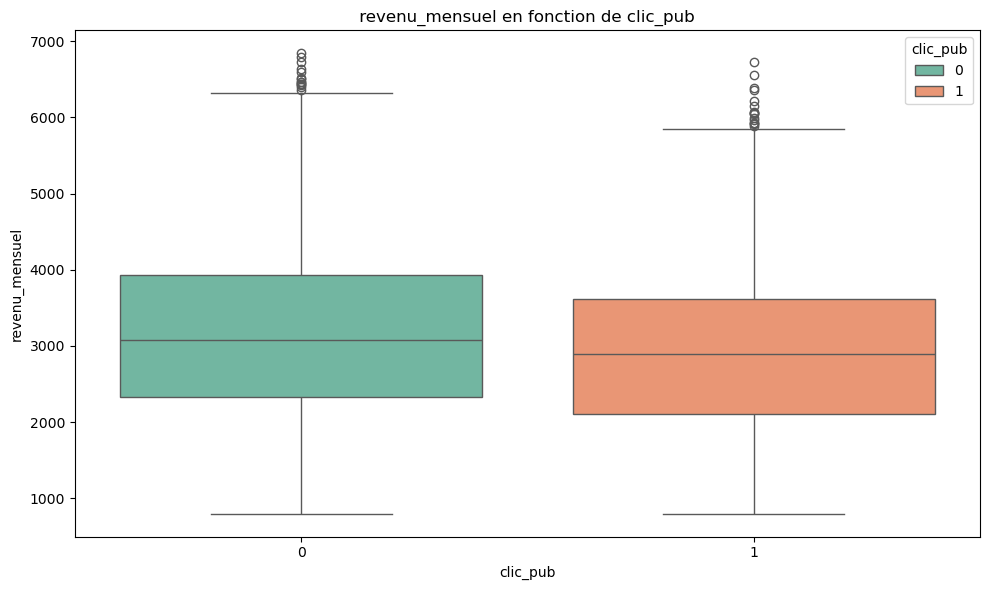

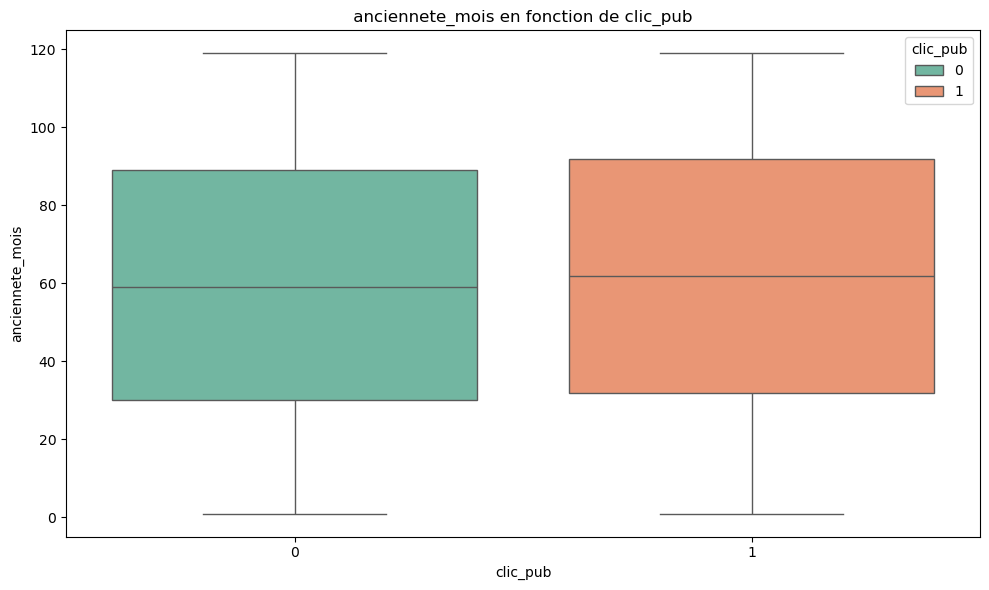

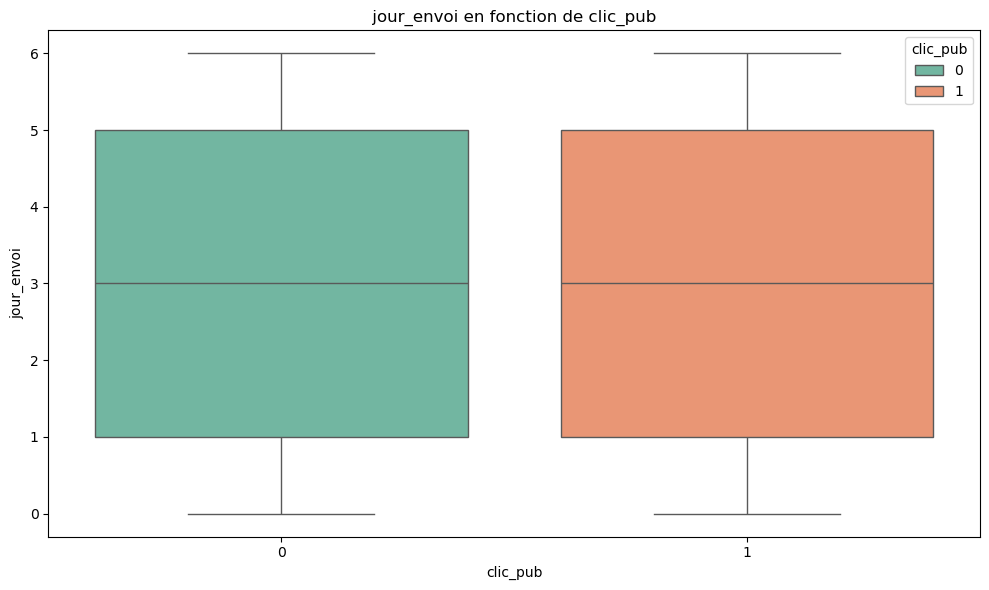

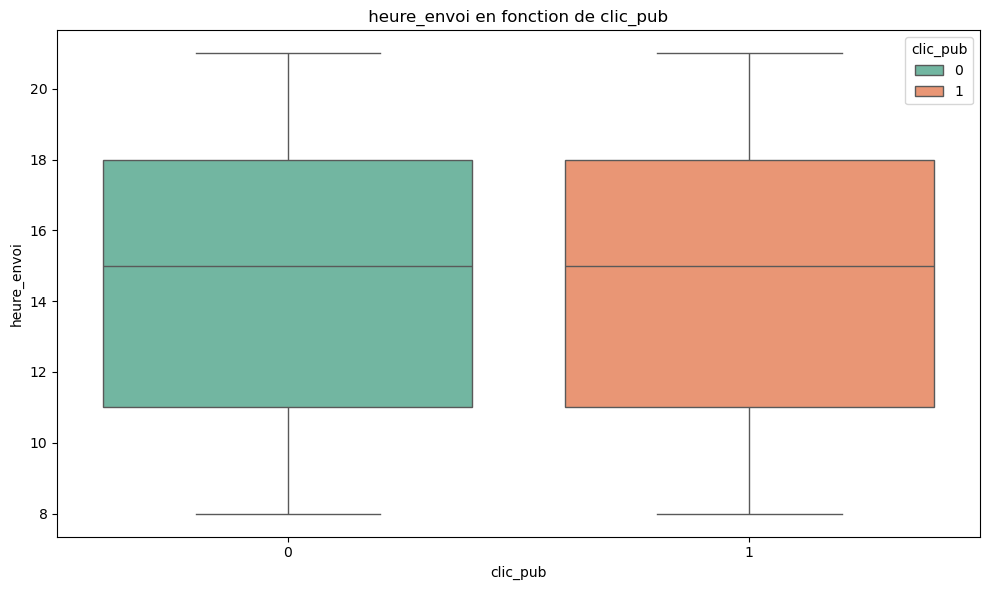

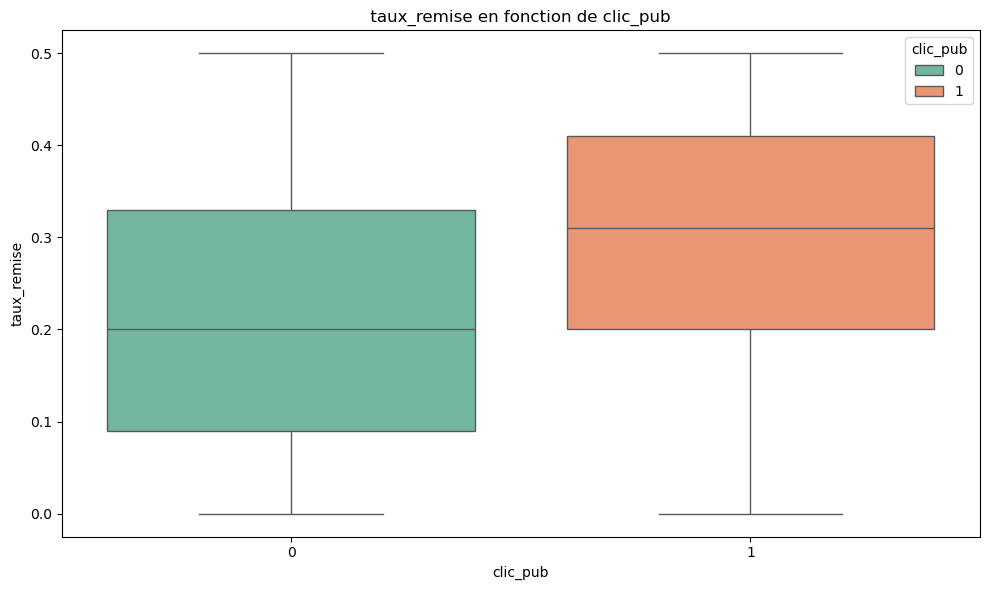

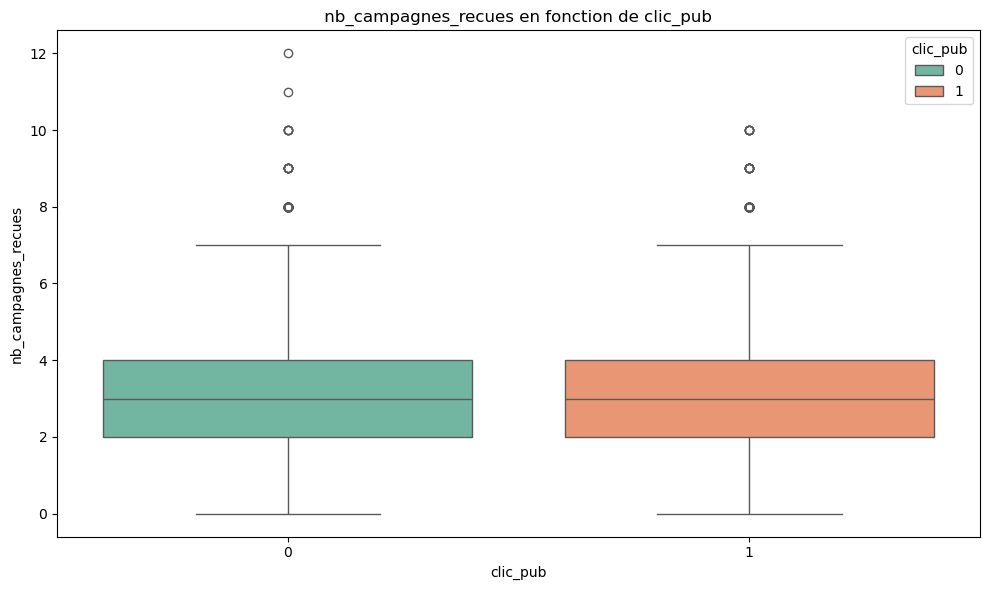

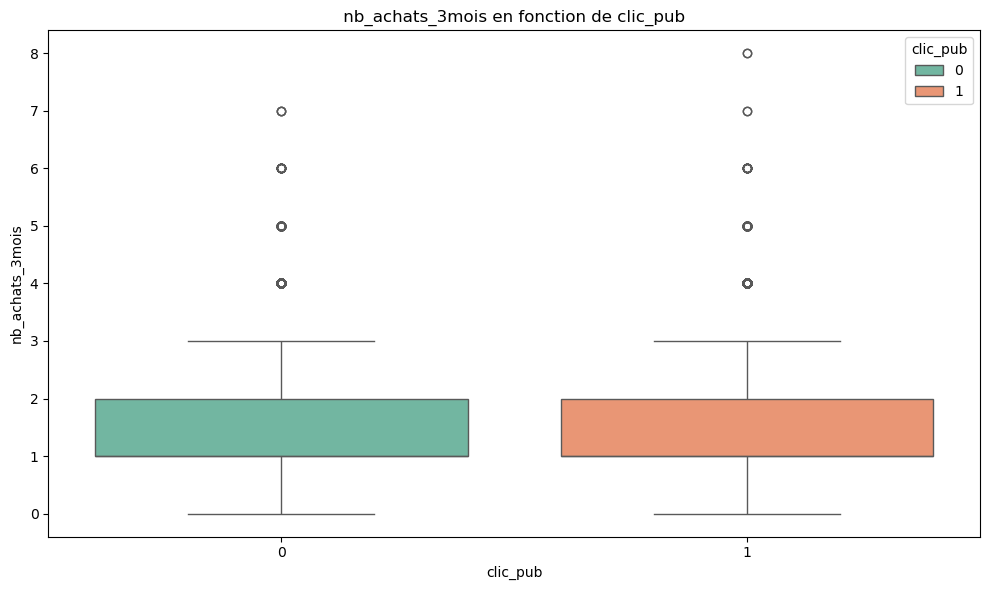

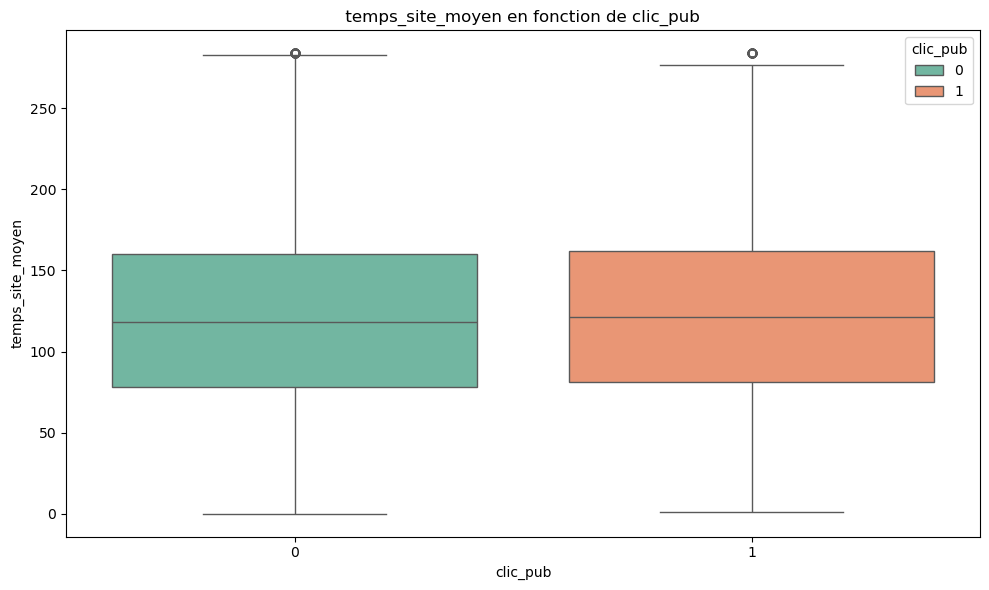

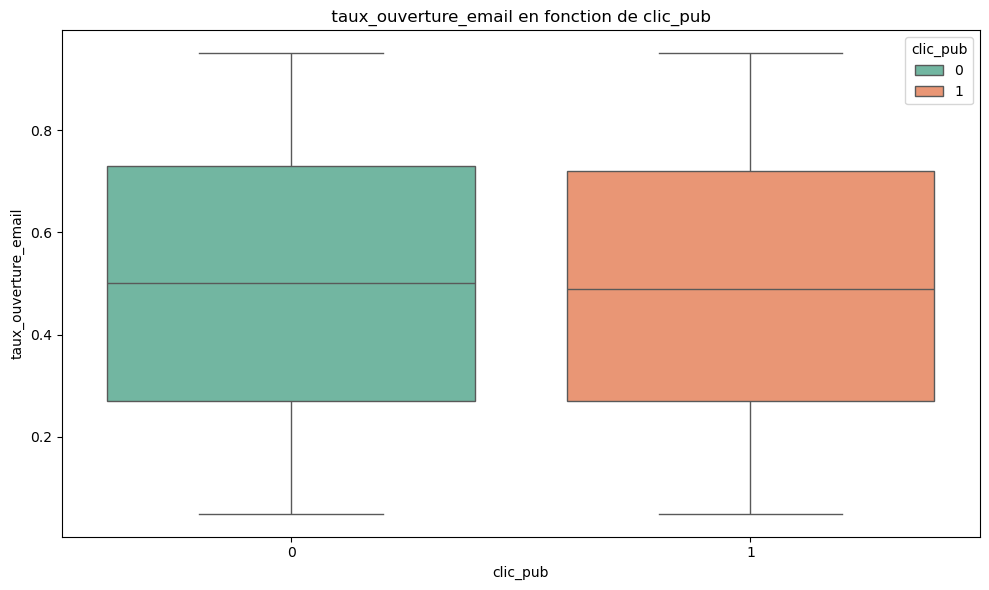

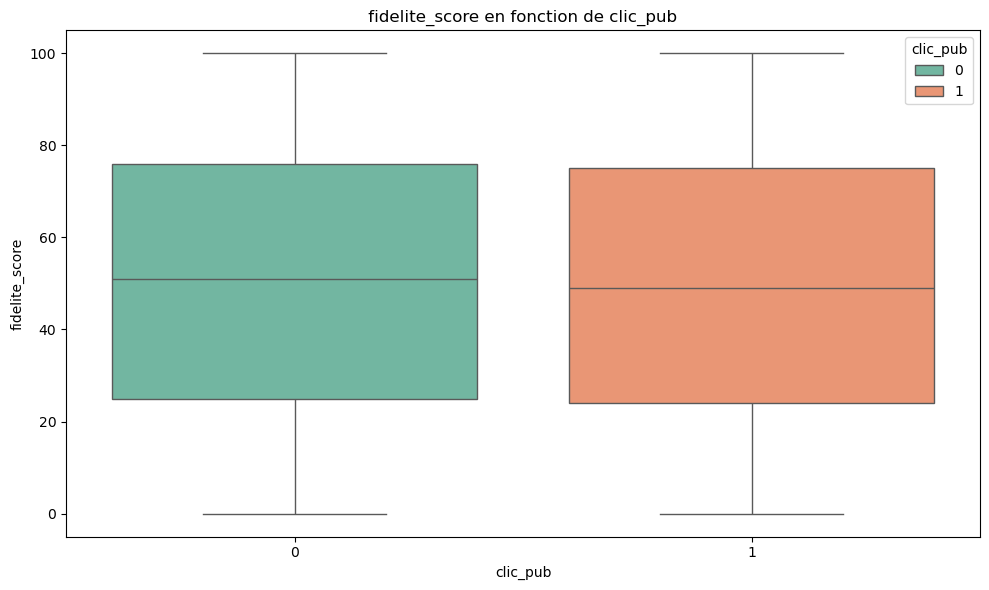

In [168]:
for col in col_num_filtre :
    plt.figure(figsize=(10,6))
    sns.boxplot( data = data_clean , x='clic_pub' , y=col ,hue='clic_pub',palette='Set2')
    plt.title(f" {col} en fonction de clic_pub ")
    plt.xlabel('clic_pub')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

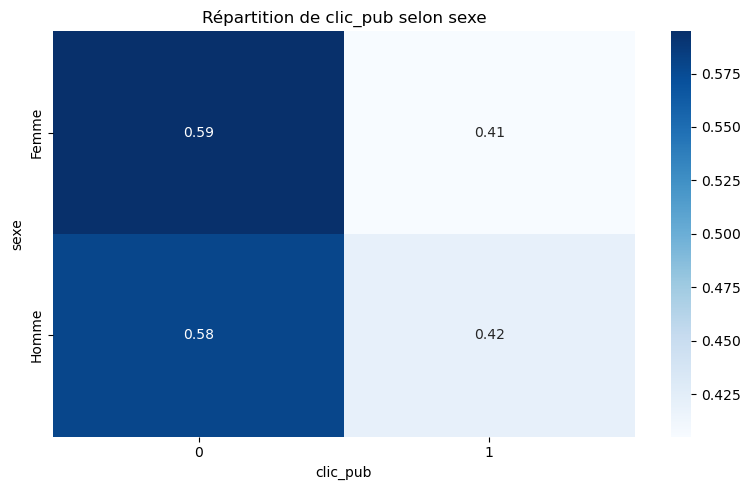

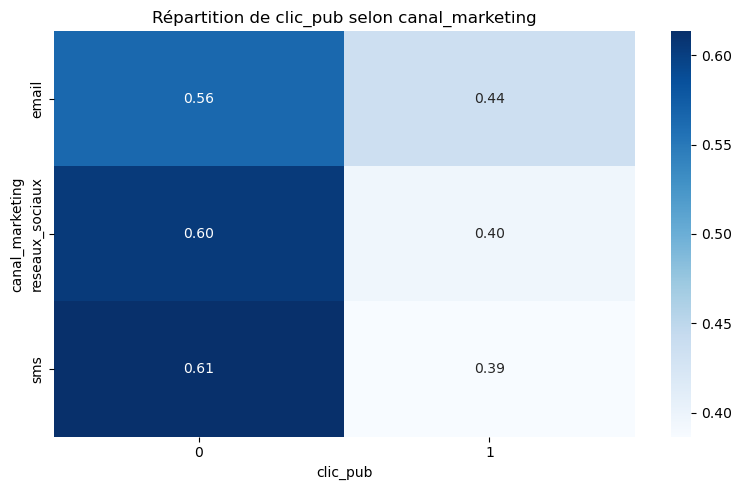

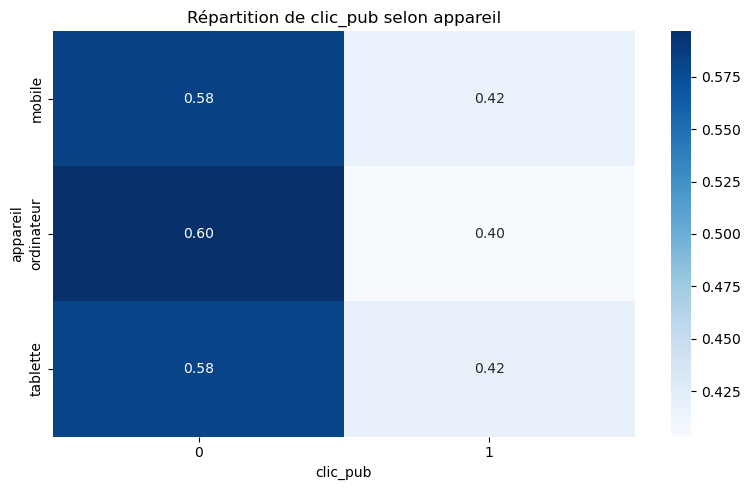

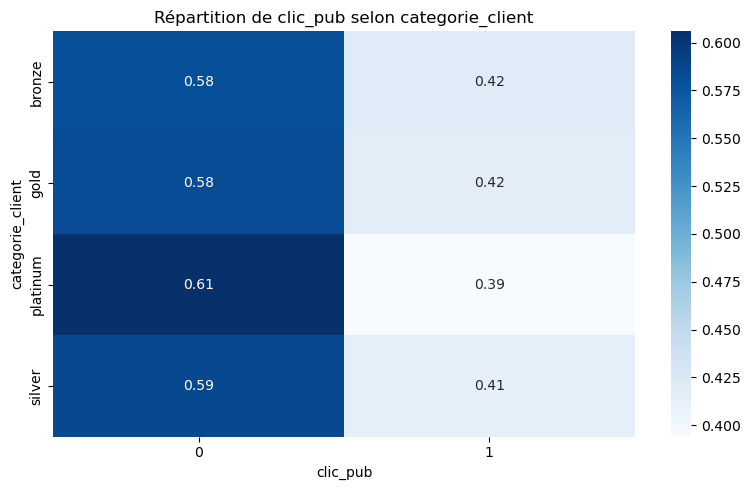

In [169]:
for col in col_categorielle:
    table = pd.crosstab(data_clean[col], data_clean['clic_pub'], normalize='index')
    
    plt.figure(figsize=(8, 5))
    sns.heatmap(table, annot=True, cmap='Blues', fmt=".2f")
    plt.title(f"Répartition de clic_pub selon {col}")
    plt.xlabel("clic_pub")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


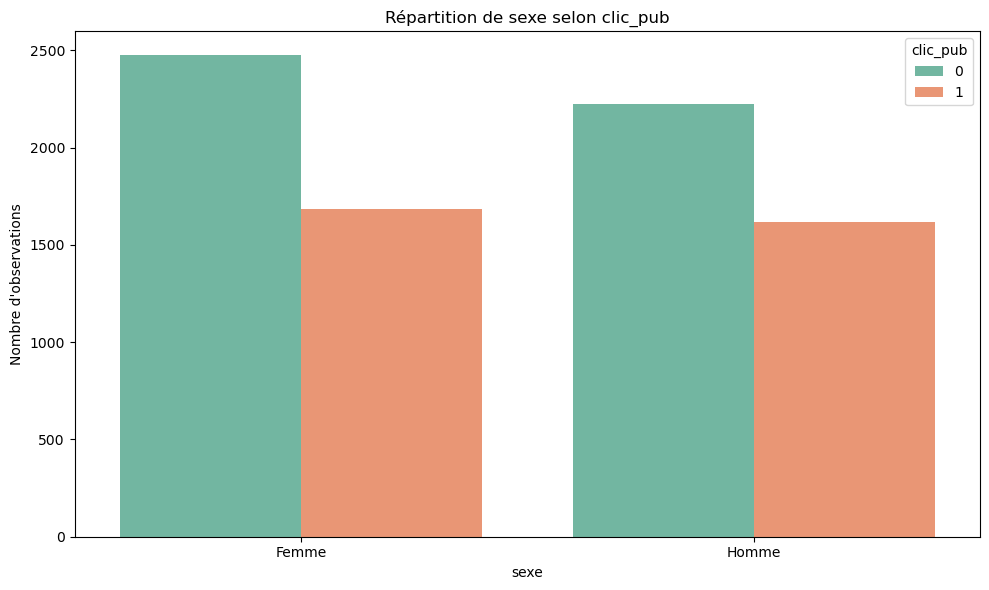

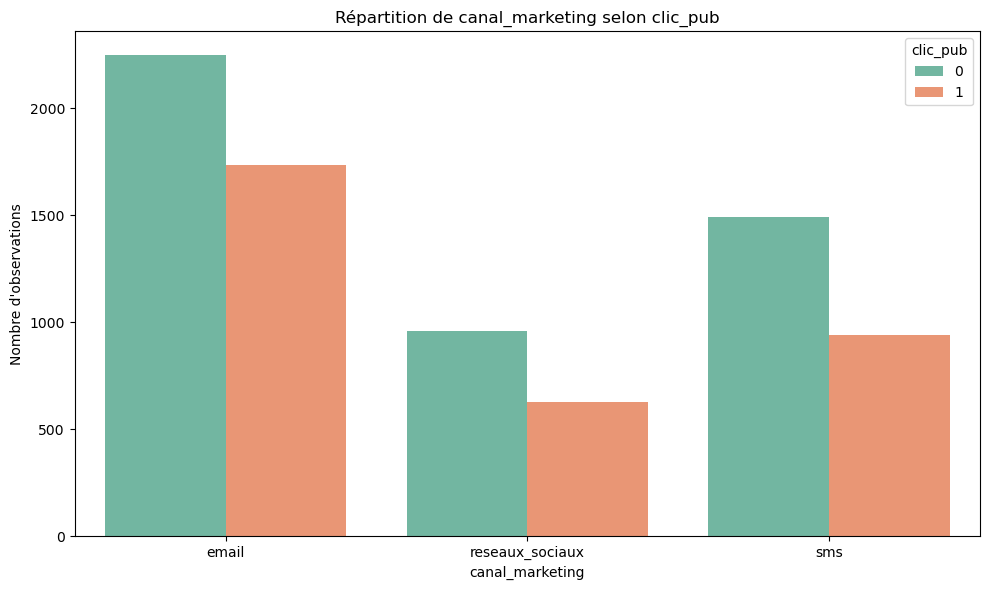

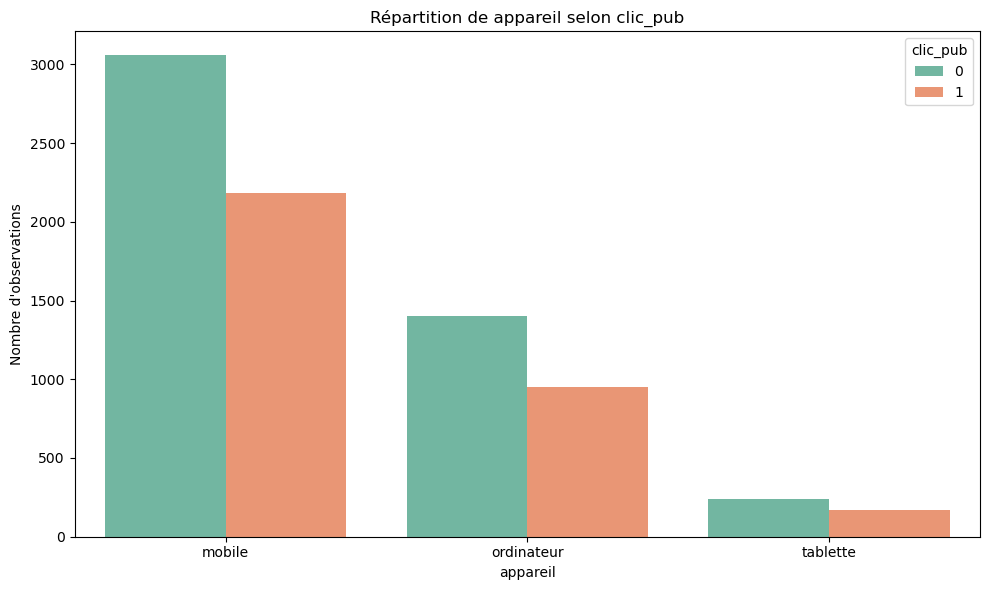

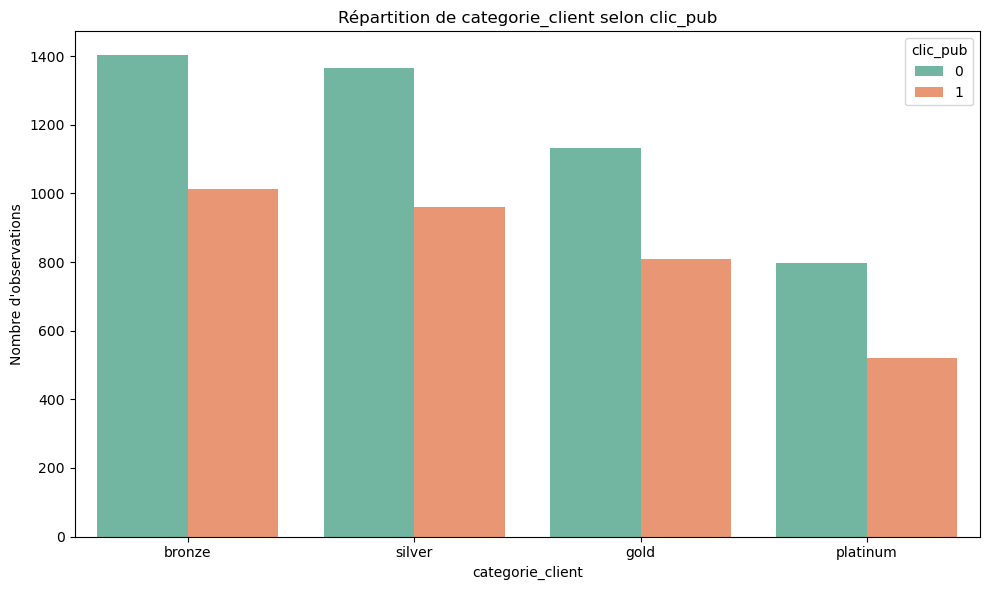

In [170]:
for col in col_categorielle:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data_clean, x=col, hue='clic_pub', palette='Set2')
    plt.title(f"Répartition de {col} selon clic_pub")
    plt.xlabel(col)
    plt.ylabel("Nombre d'observations")
    plt.tight_layout()
    plt.show()


# **Partie Test statistique**

## **Question** : **Est-ce que le canal marketing influence le clic d'un utilisateur sur une pub ??**

* **H0 : Le clic d'un utilisateur n'est pas influencé par le canal marketing.**
* **H1 : Le clic d'un utilisateur est influencé par le canal marketing.**

In [174]:
from scipy.stats import chi2_contingency

In [175]:
tableau_contingent = pd.crosstab( data_clean['canal_marketing'], data_clean['clic_pub'])

In [176]:
tableau_contingent

clic_pub,0,1
canal_marketing,,
email,2247,1733
reseaux_sociaux,959,629
sms,1492,940


In [177]:
chi2 , p_value , dof , expected = chi2_contingency(tableau_contingent)
print(f" p_value :{p_value:.4F}")
print(f" chi2 :{chi2:.4F}")

 p_value :0.0002
 chi2 :17.1680


**Le clic d'un utilisateur est bel et bien influencé par le canal marketing.**

## **Question** : **Est-ce que catégorie du client influence le clic sur une pub??**

* **H0 : Le clic d'un utilisateur n'est pas influencé par sa catégorie.**
* **H1 : Le clic d'un utilisateur est influencé par sa catégorie.**

In [181]:
tableau_contingent_categorie = pd.crosstab(data_clean['categorie_client'] , data_clean['clic_pub'])
tableau_contingent_categorie

clic_pub,0,1
categorie_client,,
bronze,1402,1013
gold,1133,809
platinum,798,519
silver,1365,961


In [182]:
chi2 , p_value , dof , expected = chi2_contingency(tableau_contingent_categorie)
print(f" p_value :{p_value:.4F}")
print(f" chi2 :{chi2:.4F}")

 p_value :0.4821
 chi2 :2.4624


**Le clic d'un utilisateur n'est pas influencé par sa catégorie.**

## **Question** : **Est-ce que l'appareil utilisé influence le clic d'un utilisateur sur une pub??**

* **H0 : Le clic d'un utilisateur n'est pas influencé par l'appareil utilisé.**
* **H1 : Le clic d'un utilisateur est influencé par l'appareil utilisé.**

In [186]:
tableau_contingent_appareil = pd.crosstab( data_clean['appareil'], data_clean['clic_pub'])
tableau_contingent_appareil

clic_pub,0,1
appareil,,
mobile,3057,2182
ordinateur,1402,948
tablette,239,172


In [187]:
chi2 , p_value , dof , expected = chi2_contingency(tableau_contingent_appareil)
print(f" p_value :{p_value:.4F}")
print(f" chi2 :{chi2:.4F}")

 p_value :0.5474
 chi2 :1.2053


**Le clic d'un utilisateur n'est pas influencé par l'appareil utilisé**

## **Question** : **Est-ce que le sexe d'un client influence le clic sur une pub ???**

* **H0 : Le clic d'un utilisateur n'est pas influencé par son sexe.**
* **H1 : Le clic d'un utilisateur est influencé par son sexe.**

In [191]:
tableau_contingent_sexe = pd.crosstab( data_clean['sexe'], data_clean['clic_pub'])
tableau_contingent_sexe

clic_pub,0,1
sexe,,
Femme,2474,1686
Homme,2224,1616


In [192]:
chi2 , p_value , dof , expected = chi2_contingency(tableau_contingent_sexe)
print(f" p_value :{p_value:.4F}")
print(f" chi2 :{chi2:.4F}")

 p_value :0.1651
 chi2 :1.9271


**Le clic d'un utilisateur n'est pas influencé par son sexe**

In [194]:
data_clean[col_num_filtre]

,age,revenu_mensuel,anciennete_mois,jour_envoi,heure_envoi,taux_remise,nb_campagnes_recues,nb_achats_3mois,temps_site_moyen,taux_ouverture_email,fidelite_score
0,22,3334.0,9,2,20,0.04,3,1,159.0,0.23,25
1,58,1546.0,109,1,16,0.22,3,3,101.0,0.42,32
2,52,2514.0,2,5,15,0.40,3,3,195.0,0.43,68
3,40,2234.0,103,0,11,0.16,0,1,57.0,0.79,45
4,40,1817.0,70,6,15,0.35,2,1,98.0,0.37,2
...,...,...,...,...,...,...,...,...,...,...,...
7995,41,4325.0,19,5,15,0.36,2,3,94.0,0.06,26
7996,55,2364.0,58,5,18,0.32,4,1,18.0,0.29,37
7997,35,1916.0,110,6,10,0.18,5,4,139.0,0.43,46
7998,24,3960.0,24,5,16,0.30,7,2,104.0,0.75,37


In [195]:
from scipy.stats import mannwhitneyu

In [196]:
for col in col_num_filtre:
    
    groupe_zero = data_clean[data_clean['clic_pub'] == 0][col]
    groupe_un = data_clean[data_clean['clic_pub'] == 1][col]
    
    stat ,p_value_w = mannwhitneyu(groupe_zero,groupe_un, alternative='two-sided')
    print(f"{col} : p-value = {p_value_w:.4f}")
    print("")

age : p-value = 0.9044

revenu_mensuel : p-value = 0.0000

anciennete_mois : p-value = 0.0082

jour_envoi : p-value = 0.1799

heure_envoi : p-value = 0.8984

taux_remise : p-value = 0.0000

nb_campagnes_recues : p-value = 0.7191

nb_achats_3mois : p-value = 0.0000

temps_site_moyen : p-value = 0.1796

taux_ouverture_email : p-value = 0.8361

fidelite_score : p-value = 0.3045



# Les variables ou il y une différence signififcative entre les deux groupes sont :
**revenu_mensuel** , **taux_remise** , **nb_achats_3mois** , **anciennete_mois**

Certaines variables numériques influencent le comportement de clic sur la pub. Les clients avec plus de remises, plus d’achats récents, et des revenus plus faibles sont plus susceptibles de cliquer. D’autres variables comme l’âge ou l’heure d’envoi n’ont pas d’impact significatif.

## **Encodage des variables catégorielles**

In [200]:
colonne_cat = data_clean.select_dtypes(include=['object']).columns
colonne_cat

Index(['sexe', 'canal_marketing', 'appareil', 'categorie_client'], dtype='object')

In [201]:
data_encode = pd.get_dummies( data_clean , columns=colonne_cat,drop_first=True)


colonnes_encodees = [col for col in data_encode.columns if any(prefix in col for prefix in colonne_cat)]
data_encode[colonnes_encodees] = data_encode[colonnes_encodees].astype(int)


In [202]:
data_encode.drop('client_id',axis=1,inplace = True)

In [203]:
data_encode

,age,revenu_mensuel,anciennete_mois,jour_envoi,heure_envoi,taux_remise,nb_campagnes_recues,nb_achats_3mois,temps_site_moyen,clic_pub,taux_ouverture_email,fidelite_score,sexe_Homme,canal_marketing_reseaux_sociaux,canal_marketing_sms,appareil_ordinateur,appareil_tablette,categorie_client_gold,categorie_client_platinum,categorie_client_silver
0,22,3334.0,9,2,20,0.04,3,1,159.0,1,0.23,25,0,0,0,0,0,0,0,0
1,58,1546.0,109,1,16,0.22,3,3,101.0,0,0.42,32,1,0,0,1,0,0,0,1
2,52,2514.0,2,5,15,0.40,3,3,195.0,1,0.43,68,0,0,0,0,0,1,0,0
3,40,2234.0,103,0,11,0.16,0,1,57.0,0,0.79,45,1,1,0,1,0,0,0,1
4,40,1817.0,70,6,15,0.35,2,1,98.0,1,0.37,2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,41,4325.0,19,5,15,0.36,2,3,94.0,0,0.06,26,0,0,1,0,0,0,0,0
7996,55,2364.0,58,5,18,0.32,4,1,18.0,0,0.29,37,1,0,0,1,0,0,0,1
7997,35,1916.0,110,6,10,0.18,5,4,139.0,0,0.43,46,1,0,0,0,0,0,0,1
7998,24,3960.0,24,5,16,0.30,7,2,104.0,0,0.75,37,0,0,1,1,0,0,0,1


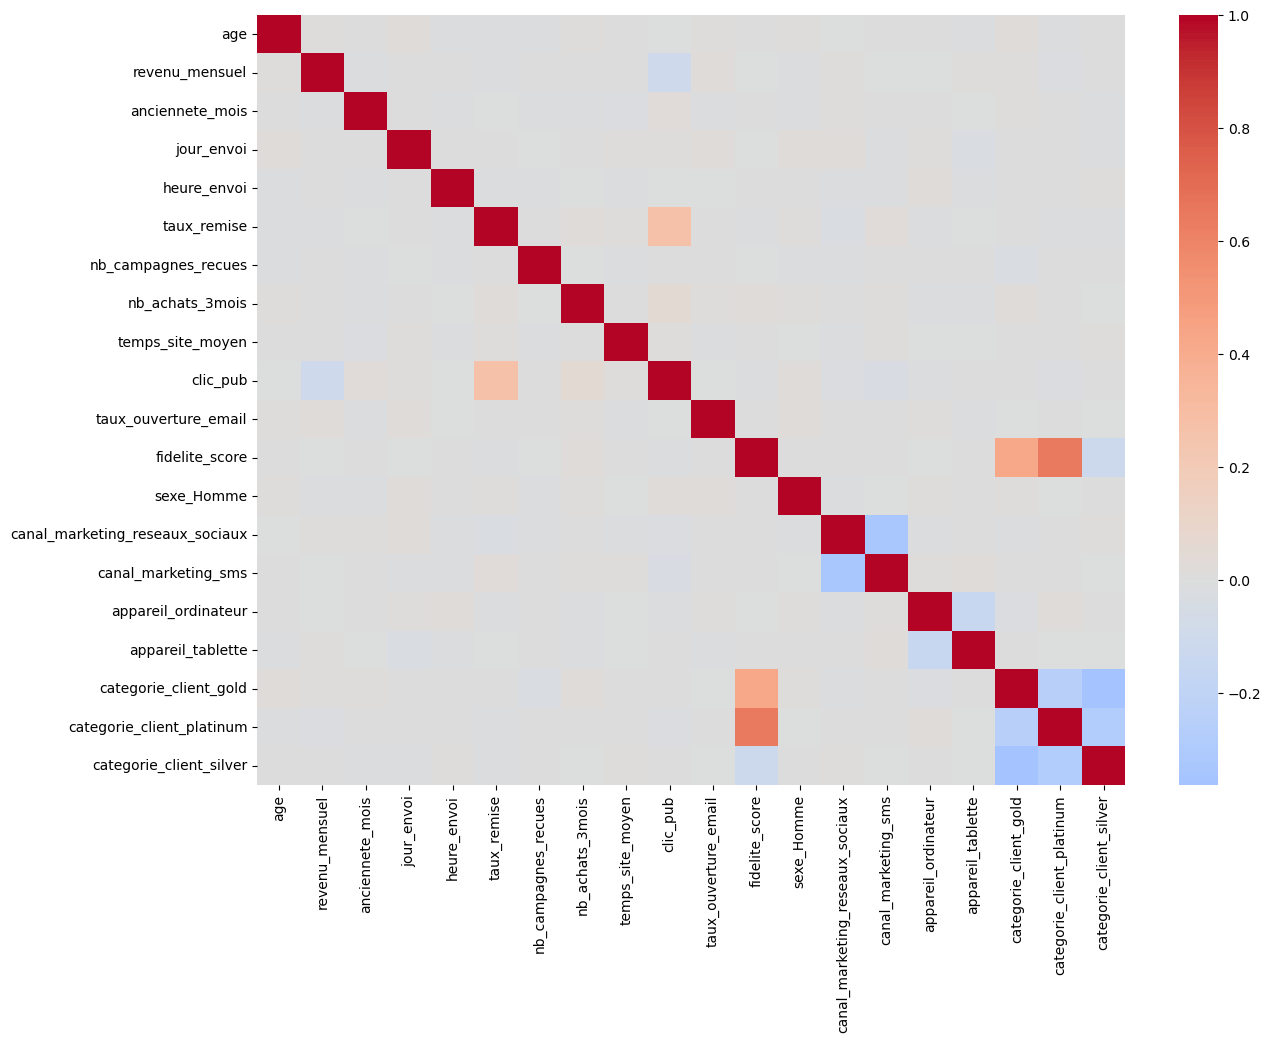

In [204]:
plt.figure(figsize=(14,10))
sns.heatmap( data_encode.corr() , annot = False , cmap = 'coolwarm' , center=0)
plt.show()

In [205]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

In [206]:
x = data_encode.drop('clic_pub',axis=1)
y = data_clean['clic_pub']

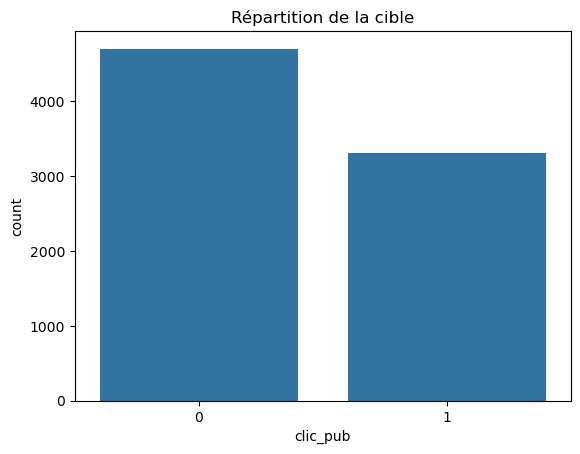

In [207]:
sns.countplot(x=y)
plt.title("Répartition de la cible")
plt.show()


In [208]:
y.value_counts(normalize=True)

clic_pub
0    0.58725
1    0.41275
Name: proportion, dtype: float64

In [362]:
x_train , x_test , y_train , y_test = train_test_split( x , y , stratify=y ,test_size=0.2 ,random_state=42)

In [364]:
scaler = StandardScaler()

In [366]:
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

In [369]:
model = LogisticRegression(class_weight='balanced')

In [371]:
model.fit(x_train_scaler , y_train)

LogisticRegression(class_weight='balanced')

In [372]:
prediction = model.predict(x_test_scaler)

In [376]:
from sklearn.metrics import accuracy_score , f1_score , r2_score , confusion_matrix , ConfusionMatrixDisplay , classification_report

In [378]:
print(accuracy_score(y_test, prediction))

0.620625


In [380]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, prediction)
print(f"Accuracy : {accuracy:.4f}")


Accuracy : 0.6206


In [360]:
F1 = f1_score(y_test,prediction)
print(F1)

0.5726415094339623


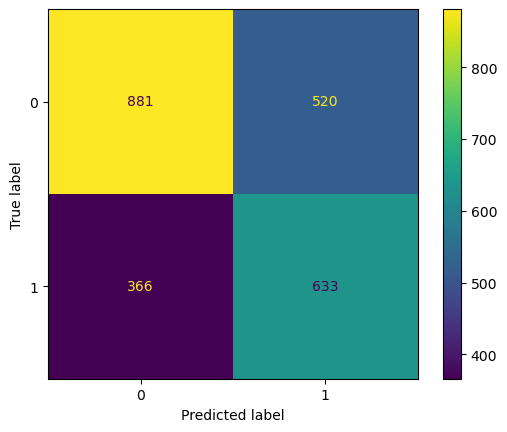

In [219]:
CM = confusion_matrix( y_test , prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=CM)
disp.plot()

In [220]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.71      0.63      0.67      1401
           1       0.55      0.63      0.59       999

    accuracy                           0.63      2400
   macro avg       0.63      0.63      0.63      2400
weighted avg       0.64      0.63      0.63      2400



Accuracy : 0.6091666666666666
F1-score : 0.4315151515151515
              precision    recall  f1-score   support

           0       0.63      0.79      0.70      1401
           1       0.55      0.36      0.43       999

    accuracy                           0.61      2400
   macro avg       0.59      0.57      0.57      2400
weighted avg       0.60      0.61      0.59      2400



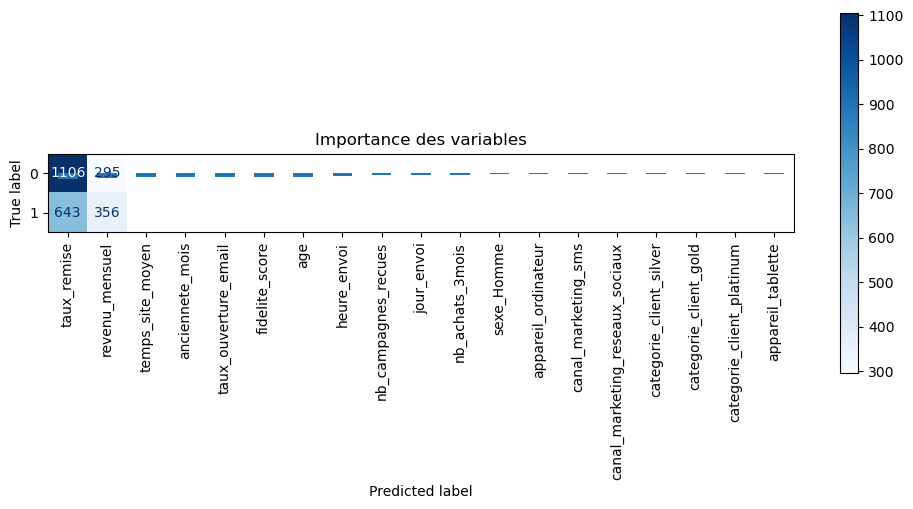

In [221]:
from sklearn.model_selection import train_test_split

X = data_encode.drop('clic_pub', axis=1)
y = data_clean['clic_pub']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_scaled, y_train)
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred_rf = rf_model.predict(X_test_scaled)

# Accuracy
print("Accuracy :", accuracy_score(y_test, y_pred_rf))

# F1-score
print("F1-score :", f1_score(y_test, y_pred_rf))

# Rapport complet
print(classification_report(y_test, y_pred_rf))

# Matrice de confusion
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf)).plot(cmap='Blues')

import pandas as pd
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
features = X.columns

pd.Series(importances, index=features).sort_values(ascending=False).plot(kind='bar', figsize=(10,5), title="Importance des variables")
plt.tight_layout()
plt.show()


In [222]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, roc_curve
)

# 1) X / y + split (stratifié)
X = data_encode.drop("clic_pub", axis=1)
y = data_encode["clic_pub"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2) Random Forest SIMPLE (aucun tuning compliqué)
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=3,
    class_weight="balanced",
    n_jobs=-1,
    random_state=42
)

rf.fit(X_train, y_train)

# 3) Évaluation (seuil 0.5)
proba_test = rf.predict_proba(X_test)[:, 1]
y_pred = (proba_test >= 0.5).astype(int)

print("=== Random Forest (simple) ===")
print("Accuracy :", round(accuracy_score(y_test, y_pred), 3))
print("Precision:", round(precision_score(y_test, y_pred), 3))
print("Recall   :", round(recall_score(y_test, y_pred), 3))
print("F1       :", round(f1_score(y_test, y_pred), 3))
print("ROC AUC  :", round(roc_auc_score(y_test, proba_test), 3))
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred))
print("\nClassification report :\n", classification_report(y_test, y_pred, digits=3))

# 4) Importance des variables (top 15)
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 15 features :\n", importances.head(15))


=== Random Forest (simple) ===
Accuracy : 0.614
Precision: 0.535
Recall   : 0.492
F1       : 0.513
ROC AUC  : 0.648

Matrice de confusion :
 [[657 283]
 [335 325]]

Classification report :
               precision    recall  f1-score   support

           0      0.662     0.699     0.680       940
           1      0.535     0.492     0.513       660

    accuracy                          0.614      1600
   macro avg      0.598     0.596     0.596      1600
weighted avg      0.610     0.614     0.611      1600


Top 15 features :
 taux_remise                0.185633
revenu_mensuel             0.113871
temps_site_moyen           0.094191
anciennete_mois            0.091908
taux_ouverture_email       0.087751
fidelite_score             0.083784
age                        0.082890
heure_envoi                0.060925
jour_envoi                 0.044327
nb_campagnes_recues        0.043681
nb_achats_3mois            0.033373
sexe_Homme                 0.015417
appareil_ordinateur        0.01

In [382]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# === 1. Colonnes
target = "clic_pub"
cat_cols = ["sexe","canal_marketing","appareil","categorie_client"]
num_cols = ["age","revenu_mensuel","anciennete_mois","jour_envoi","heure_envoi",
            "taux_remise","nb_campagnes_recues","nb_achats_3mois",
            "temps_site_moyen","taux_ouverture_email","fidelite_score"]

# data_clean = ton DF nettoyé
X = data_clean[cat_cols + num_cols].copy()
y = data_clean[target].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# === 2. Prétraitement
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", StandardScaler(), num_cols),
    ],
    remainder="drop"
)

# === 3. Modèle RL (simple et propre)
rl = LogisticRegression(max_iter=200, class_weight="balanced", random_state=42)

# === 4. Pipeline complet
pipe = Pipeline(steps=[("preprocess", preprocess),
                      ("model", rl)])

pipe.fit(X_train, y_train)

# (optionnel) évaluer
from sklearn.metrics import roc_auc_score
proba = pipe.predict_proba(X_test)[:,1]
print("AUC test:", round(roc_auc_score(y_test, proba), 3))

# === 5. Sauvegarde
joblib.dump({
    "pipeline": pipe,
    "cat_cols": cat_cols,
    "num_cols": num_cols
}, "modele_rl_pipeline.joblib")

print("✅ Pipeline RL sauvegardé -> modele_rl_pipeline.joblib")


AUC test: 0.663
✅ Pipeline RL sauvegardé -> modele_rl_pipeline.joblib


In [384]:
data_clean.to_csv('data_clean_marketing.csv',index=False)